In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)


In [3]:
df = pd.read_csv(r"/kaggle/input/amazon-music-reviews/Musical_instruments_reviews.csv")
df.head(10)

reviewerID        asin  \
0  A2IBPI20UZIR0U  1384719342   
1  A14VAT5EAX3D9S  1384719342   
2  A195EZSQDW3E21  1384719342   
3  A2C00NNG1ZQQG2  1384719342   
4   A94QU4C90B1AX  1384719342   
5  A2A039TZMZHH9Y  B00004Y2UT   
6  A1UPZM995ZAH90  B00004Y2UT   
7   AJNFQI3YR6XJ5  B00004Y2UT   
8  A3M1PLEYNDEYO8  B00004Y2UT   
9   AMNTZU1YQN1TH  B00004Y2UT   

                                       reviewerName   helpful  \
0  cassandra tu "Yeah, well, that's just like, u...    [0, 0]   
1                                              Jake  [13, 14]   
2                     Rick Bennette "Rick Bennette"    [1, 1]   
3                         RustyBill "Sunday Rocker"    [0, 0]   
4                                     SEAN MASLANKA    [0, 0]   
5                               Bill Lewey "blewey"    [0, 0]   
6                                             Brian    [0, 0]   
7                                 Fender Guy "Rick"    [0, 0]   
8                                   G. Thomas "Tom"    [0, 0]   
9                                       Kurt Robair    [0, 0]   

                                          reviewText  overall  \
0  Not much to write about here, but it does exac...      5.0   
1  The product does exactly as it should and is q...      5.0   
2  The primary job of this device is to block the...      5.0   
3  Nice windscreen protects my MXL mic and preven...      5.0   
4  This pop filter is great. It looks and perform...      5.0   
5  So good that I bought another one.  Love the h...      5.0   
6  I have used monster cables for years, and with...      5.0   
7  I now use this cable to run from the output of...      3.0   
8  Perfect for my Epiphone Sheraton II.  Monster ...      5.0   
9  Monster makes the best cables and a lifetime w...      5.0   

                                       summary  unixReviewTime   reviewTime  
0                                         good      1393545600  02 28, 2014  
1                                         Jake      1363392000  03 16, 2013  
2                         It Does The Job Well      1377648000  08 28, 2013  
3                GOOD WINDSCREEN FOR THE MONEY      1392336000  02 14, 2014  
4        No more pops when I record my vocals.      1392940800  02 21, 2014  
5                               The Best Cable      1356048000  12 21, 2012  
6  Monster Standard 100 - 21' Instrument Cable      1390089600  01 19, 2014  
7           Didn't fit my 1996 Fender Strat...      1353024000  11 16, 2012  
8                                  Great cable      1215302400   07 6, 2008  
9         Best Instrument Cables On The Market      1389139200   01 8, 2014

In [4]:
df.shape

(10261, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10261 non-null  object 
 1   asin            10261 non-null  object 
 2   reviewerName    10234 non-null  object 
 3   helpful         10261 non-null  object 
 4   reviewText      10254 non-null  object 
 5   overall         10261 non-null  float64
 6   summary         10261 non-null  object 
 7   unixReviewTime  10261 non-null  int64  
 8   reviewTime      10261 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 721.6+ KB


In [6]:
df.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

# Data Preprocessing

We got null values in reviewer names and review text. Reviewer names doesn't add any value(we got id's instead) to our objective of the project. So let's focus on review text. I don't think dropping wouldn't be a problem as there are only 7 null values, but instead I'm thinking to impute that as missing and explore why they didn't leave any review . Could it be due to ratings?

In [7]:
df['reviewText']=df['reviewText'].fillna('Missing')

In [8]:
# Concatenating review text and summary
df['reviews']=df['reviewText']+df['summary']
df=df.drop(['reviewText', 'summary'], axis=1)
df.head()

reviewerID        asin  \
0  A2IBPI20UZIR0U  1384719342   
1  A14VAT5EAX3D9S  1384719342   
2  A195EZSQDW3E21  1384719342   
3  A2C00NNG1ZQQG2  1384719342   
4   A94QU4C90B1AX  1384719342   

                                       reviewerName   helpful  overall  \
0  cassandra tu "Yeah, well, that's just like, u...    [0, 0]      5.0   
1                                              Jake  [13, 14]      5.0   
2                     Rick Bennette "Rick Bennette"    [1, 1]      5.0   
3                         RustyBill "Sunday Rocker"    [0, 0]      5.0   
4                                     SEAN MASLANKA    [0, 0]      5.0   

   unixReviewTime   reviewTime  \
0      1393545600  02 28, 2014   
1      1363392000  03 16, 2013   
2      1377648000  08 28, 2013   
3      1392336000  02 14, 2014   
4      1392940800  02 21, 2014   

                                             reviews  
0  Not much to write about here, but it does exac...  
1  The product does exactly as it should and is q...  
2  The primary job of this device is to block the...  
3  Nice windscreen protects my MXL mic and preven...  
4  This pop filter is great. It looks and perform...

In [9]:
df['overall'].value_counts()

overall
5.0    6938
4.0    2084
3.0     772
2.0     250
1.0     217
Name: count, dtype: int64

Creating **sentiment** column<br>
This is an important preprocessing phase, we are deciding the outcome column (sentiment of review) based on the overall score. If the score is greater than 3, we take that as positive and if the value is less than 3 it is negative If it is equal to 3, we take that as neutral sentiment

In [10]:
def f(row):
    
    '''This function returns sentiment value based on the overall ratings from the user'''
    
    if row['overall'] == 3.0:
        val = 'Neutral'
    elif row['overall'] < 3.0:
        val = 'Negative'
    elif row['overall'] >3.0 :
        val = 'Positive'
    return val

In [11]:
#Applying the function in our new column
df['sentiment'] = df.apply(f, axis=1)

In [12]:
df['sentiment'].value_counts()

sentiment
Positive    9022
Neutral      772
Negative     467
Name: count, dtype: int64

In [13]:
# Extracting day, month and year from review time column.

def time_func(row):
    row['year'] = row['reviewTime'].split(',')[1]
    row['day'] = (row['reviewTime'].split(',')[0]).split(' ')[1]
    row['month'] = (row['reviewTime'].split(',')[0]).split(' ')[0]
    return row

In [14]:
df = df.apply(time_func,axis = 'columns')

In [15]:
df=df.drop(['reviewTime'], axis=1)
df.head(10)

reviewerID        asin  \
0  A2IBPI20UZIR0U  1384719342   
1  A14VAT5EAX3D9S  1384719342   
2  A195EZSQDW3E21  1384719342   
3  A2C00NNG1ZQQG2  1384719342   
4   A94QU4C90B1AX  1384719342   
5  A2A039TZMZHH9Y  B00004Y2UT   
6  A1UPZM995ZAH90  B00004Y2UT   
7   AJNFQI3YR6XJ5  B00004Y2UT   
8  A3M1PLEYNDEYO8  B00004Y2UT   
9   AMNTZU1YQN1TH  B00004Y2UT   

                                       reviewerName   helpful  overall  \
0  cassandra tu "Yeah, well, that's just like, u...    [0, 0]      5.0   
1                                              Jake  [13, 14]      5.0   
2                     Rick Bennette "Rick Bennette"    [1, 1]      5.0   
3                         RustyBill "Sunday Rocker"    [0, 0]      5.0   
4                                     SEAN MASLANKA    [0, 0]      5.0   
5                               Bill Lewey "blewey"    [0, 0]      5.0   
6                                             Brian    [0, 0]      5.0   
7                                 Fender Guy "Rick"    [0, 0]      3.0   
8                                   G. Thomas "Tom"    [0, 0]      5.0   
9                                       Kurt Robair    [0, 0]      5.0   

   unixReviewTime                                            reviews  \
0      1393545600  Not much to write about here, but it does exac...   
1      1363392000  The product does exactly as it should and is q...   
2      1377648000  The primary job of this device is to block the...   
3      1392336000  Nice windscreen protects my MXL mic and preven...   
4      1392940800  This pop filter is great. It looks and perform...   
5      1356048000  So good that I bought another one.  Love the h...   
6      1390089600  I have used monster cables for years, and with...   
7      1353024000  I now use this cable to run from the output of...   
8      1215302400  Perfect for my Epiphone Sheraton II.  Monster ...   
9      1389139200  Monster makes the best cables and a lifetime w...   

  sentiment   year day month  
0  Positive   2014  28    02  
1  Positive   2013  16    03  
2  Positive   2013  28    08  
3  Positive   2014  14    02  
4  Positive   2014  21    02  
5  Positive   2012  21    12  
6  Positive   2014  19    01  
7   Neutral   2012  16    11  
8  Positive   2008   6    07  
9  Positive   2014   8    01

From the main dataframe we can see the helpful feature with values in list [a,b] format. It says that a out of b people found that review helpful. But with that format, it could not add value to the machine learning model and it will be difficult to decrypt the meaning for the machine. So I have planned to create helpful_rate feature which returns a/b value from [a,b]

In [16]:
def helpful_func(row):
    s = row['helpful']
    a = int(s.split('[')[1].split(']')[0].split(',')[0])
    b = int(s.split('[')[1].split(']')[0].split(',')[1])
    if b == 0:
        row['helpful_rate'] = -1
    else:
        row['helpful_rate'] = a/b
    return row
# If helpful_rate is -1 then it signifies that we cant draw any conclusion since b is 0 and a out of b
# find it helpful. It may or may not be helpful.

In [17]:
df = df.apply(helpful_func,axis = 1)

In [18]:
df.drop('helpful',inplace=True,axis = 1)
df['helpful_rate'] = df['helpful_rate'].round(2)
df.head()

reviewerID        asin  \
0  A2IBPI20UZIR0U  1384719342   
1  A14VAT5EAX3D9S  1384719342   
2  A195EZSQDW3E21  1384719342   
3  A2C00NNG1ZQQG2  1384719342   
4   A94QU4C90B1AX  1384719342   

                                       reviewerName  overall  unixReviewTime  \
0  cassandra tu "Yeah, well, that's just like, u...      5.0      1393545600   
1                                              Jake      5.0      1363392000   
2                     Rick Bennette "Rick Bennette"      5.0      1377648000   
3                         RustyBill "Sunday Rocker"      5.0      1392336000   
4                                     SEAN MASLANKA      5.0      1392940800   

                                             reviews sentiment   year day  \
0  Not much to write about here, but it does exac...  Positive   2014  28   
1  The product does exactly as it should and is q...  Positive   2013  16   
2  The primary job of this device is to block the...  Positive   2013  28   
3  Nice windscreen protects my MXL mic and preven...  Positive   2014  14   
4  This pop filter is great. It looks and perform...  Positive   2014  21   

  month  helpful_rate  
0    02         -1.00  
1    03          0.93  
2    08          1.00  
3    02         -1.00  
4    02         -1.00

In [19]:
#Removing unnecessary columns
df=df.drop(['reviewerName','unixReviewTime'], axis=1)

In [20]:
df

reviewerID        asin  overall  \
0      A2IBPI20UZIR0U  1384719342      5.0   
1      A14VAT5EAX3D9S  1384719342      5.0   
2      A195EZSQDW3E21  1384719342      5.0   
3      A2C00NNG1ZQQG2  1384719342      5.0   
4       A94QU4C90B1AX  1384719342      5.0   
...               ...         ...      ...   
10256  A14B2YH83ZXMPP  B00JBIVXGC      5.0   
10257   A1RPTVW5VEOSI  B00JBIVXGC      5.0   
10258   AWCJ12KBO5VII  B00JBIVXGC      4.0   
10259  A2Z7S8B5U4PAKJ  B00JBIVXGC      4.0   
10260  A2WA8TDCTGUADI  B00JBIVXGC      4.0   

                                                 reviews sentiment   year day  \
0      Not much to write about here, but it does exac...  Positive   2014  28   
1      The product does exactly as it should and is q...  Positive   2013  16   
2      The primary job of this device is to block the...  Positive   2013  28   
3      Nice windscreen protects my MXL mic and preven...  Positive   2014  14   
4      This pop filter is great. It looks and perform...  Positive   2014  21   
...                                                  ...       ...    ...  ..   
10256  Great, just as expected.  Thank to all.Five Stars  Positive   2014  20   
10257  I've been thinking about trying the Nanoweb st...  Positive   2014   2   
10258  I have tried coated strings in the past ( incl...  Positive   2014  22   
10259  Well, MADE by Elixir and DEVELOPED with Taylor...  Positive   2014   1   
10260  These strings are really quite good, but I wou...  Positive   2014  16   

      month  helpful_rate  
0        02         -1.00  
1        03          0.93  
2        08          1.00  
3        02         -1.00  
4        02         -1.00  
...     ...           ...  
10256    07         -1.00  
10257    07         -1.00  
10258    07         -1.00  
10259    07         -1.00  
10260    07         -1.00  

[10261 rows x 9 columns]

# Text Cleaning

In [21]:
import re
import string

In [22]:
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [23]:
df['reviews']=df['reviews'].apply(lambda x:review_cleaning(x))
df.head()

reviewerID        asin  overall  \
0  A2IBPI20UZIR0U  1384719342      5.0   
1  A14VAT5EAX3D9S  1384719342      5.0   
2  A195EZSQDW3E21  1384719342      5.0   
3  A2C00NNG1ZQQG2  1384719342      5.0   
4   A94QU4C90B1AX  1384719342      5.0   

                                             reviews sentiment   year day  \
0  not much to write about here but it does exact...  Positive   2014  28   
1  the product does exactly as it should and is q...  Positive   2013  16   
2  the primary job of this device is to block the...  Positive   2013  28   
3  nice windscreen protects my mxl mic and preven...  Positive   2014  14   
4  this pop filter is great it looks and performs...  Positive   2014  21   

  month  helpful_rate  
0    02         -1.00  
1    03          0.93  
2    08          1.00  
3    02         -1.00  
4    02         -1.00

In [24]:
# Removing stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [25]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

nltk stop words contains words like not,hasn't,would'nt which actually conveys a negative sentiment. If we remove that it will end up contradicting the target variable(sentiment). So I have to curate the stop words which doesn't have any negative sentiment or any negative alternatives.

In [26]:
original_stop_words = set(stopwords.words('english'))

# List of words to exclude (negation words and words with negative sentiment)
negation_words = {
    'no', 'nor', 'not', "don't", "shouldn't", 'ain', 'aren', "aren't", 
    'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', 
    "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'mightn', 
    "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 
    'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', 
    "won't", 'wouldn', "wouldn't"
}

curated_stop_words = original_stop_words - negation_words

# Convert the set back to a sorted list for readability
curated_stop_words = sorted(list(curated_stop_words))

print(curated_stop_words)

['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'd', 'did', 'do', 'does', 'doing', 'don', 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'more', 'most', 'my', 'myself', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'she', "she's", 'should', "should've", 'so', 'some', 'such', 't', 'than', 'that', "that'll", 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 've', 'very', 'was', 'we', 'were', 'what', 'when', 'where', 'which', 'while', 'who', 'whom', 'why', 'w

In [27]:
df['reviews'] = df['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (curated_stop_words)]))
df.head()

reviewerID        asin  overall  \
0  A2IBPI20UZIR0U  1384719342      5.0   
1  A14VAT5EAX3D9S  1384719342      5.0   
2  A195EZSQDW3E21  1384719342      5.0   
3  A2C00NNG1ZQQG2  1384719342      5.0   
4   A94QU4C90B1AX  1384719342      5.0   

                                             reviews sentiment   year day  \
0  not much write exactly supposed filters pop so...  Positive   2014  28   
1  product exactly quite affordablei not realized...  Positive   2013  16   
2  primary job device block breath would otherwis...  Positive   2013  28   
3  nice windscreen protects mxl mic prevents pops...  Positive   2014  14   
4  pop filter great looks performs like studio fi...  Positive   2014  21   

  month  helpful_rate  
0    02         -1.00  
1    03          0.93  
2    08          1.00  
3    02         -1.00  
4    02         -1.00

In [28]:
import spacy
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens)

In [29]:
data = {'reviews': list(negation_words)}
df_sample = pd.DataFrame(data)

# Apply preprocessing function
df_sample['preprocessed_reviews'] = df_sample['reviews'].apply(preprocess)

print(df_sample)

      reviews preprocessed_reviews
0    mightn't            might not
1        hasn                 hasn
2       isn't               be not
3      hadn't             have not
4      couldn               couldn
5        hadn                 hadn
6     doesn't               do not
7         ain                  ain
8         isn                  isn
9       weren                weren
10    needn't             need not
11    haven't             have not
12     aren't               be not
13        nor                  nor
14   wouldn't            would not
15       shan                 shan
16        not                  not
17       aren                 aren
18    shouldn              shouldn
19         no                   no
20     hasn't             have not
21      mustn                mustn
22    mustn't             must not
23      doesn                doesn
24      haven                haven
25    weren't               be not
26      won't             will not
27     didn't       

As we can see lemmatization doesnt affect negative stop words and withholds the semantic meaning of words. So we will use lemmatization to further clean our reviews

In [30]:
df['reviews'] = df['reviews'].apply(preprocess)

In [31]:
df

reviewerID        asin  overall  \
0      A2IBPI20UZIR0U  1384719342      5.0   
1      A14VAT5EAX3D9S  1384719342      5.0   
2      A195EZSQDW3E21  1384719342      5.0   
3      A2C00NNG1ZQQG2  1384719342      5.0   
4       A94QU4C90B1AX  1384719342      5.0   
...               ...         ...      ...   
10256  A14B2YH83ZXMPP  B00JBIVXGC      5.0   
10257   A1RPTVW5VEOSI  B00JBIVXGC      5.0   
10258   AWCJ12KBO5VII  B00JBIVXGC      4.0   
10259  A2Z7S8B5U4PAKJ  B00JBIVXGC      4.0   
10260  A2WA8TDCTGUADI  B00JBIVXGC      4.0   

                                                 reviews sentiment   year day  \
0      not much write exactly suppose filter pop soun...  Positive   2014  28   
1      product exactly quite affordablei not realize ...  Positive   2013  16   
2      primary job device block breath would otherwis...  Positive   2013  28   
3      nice windscreen protect mxl mic prevent pop th...  Positive   2014  14   
4      pop filter great look perform like studio filt...  Positive   2014  21   
...                                                  ...       ...    ...  ..   
10256                    great expect thank allfive star  Positive   2014  20   
10257  I ve think try nanoweb string bit put high pri...  Positive   2014   2   
10258  try coated string past include elixir never fo...  Positive   2014  22   
10259  well make elixir develop taylor guitar string ...  Positive   2014   1   
10260  string really quite good would not call perfec...  Positive   2014  16   

      month  helpful_rate  
0        02         -1.00  
1        03          0.93  
2        08          1.00  
3        02         -1.00  
4        02         -1.00  
...     ...           ...  
10256    07         -1.00  
10257    07         -1.00  
10258    07         -1.00  
10259    07         -1.00  
10260    07         -1.00  

[10261 rows x 9 columns]

# Visualizations

In [32]:
pd.DataFrame(df[df['helpful_rate']!=-1].groupby('sentiment')['helpful_rate'].mean())

helpful_rate
sentiment              
Negative       0.493574
Neutral        0.606353
Positive       0.832547

<Axes: xlabel='sentiment', ylabel='helpful_rate'>

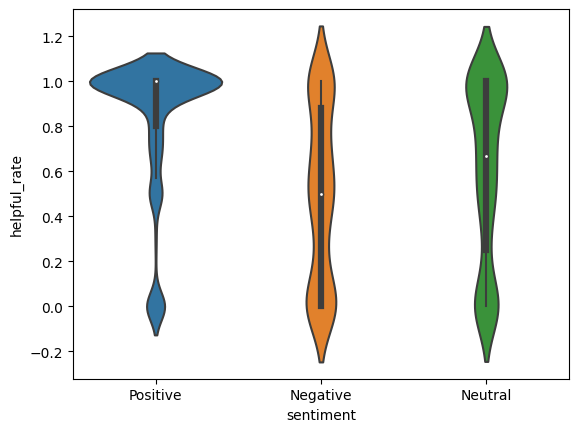

In [33]:
sns.violinplot(data=df[df['helpful_rate']!=-1], y = 'helpful_rate',x = 'sentiment')

Customers find positive sentiment reviews more helpful than negative and neutral reviews

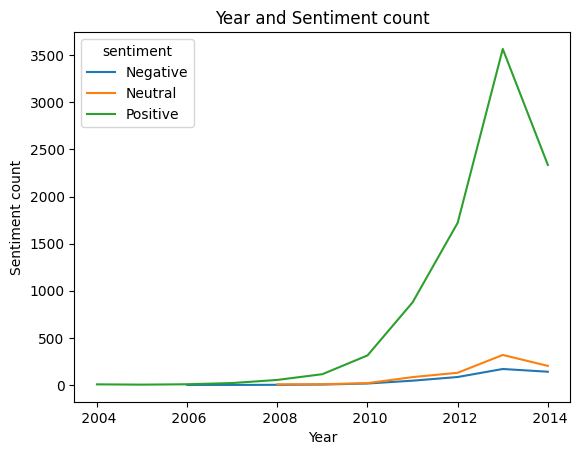

In [34]:
df.groupby(['year','sentiment'])['sentiment'].count().unstack().plot(legend=True)
plt.title('Year and Sentiment count')
plt.xlabel('Year')
plt.ylabel('Sentiment count')
plt.show()

From the plot we can clearly see the rise in positive reviews from 2010. Reaching its peak around 2013 and there is a dip in 2014, All the review rates were dropped at this time. Negative and neutral reviews are very low as compared to the positive reviews.

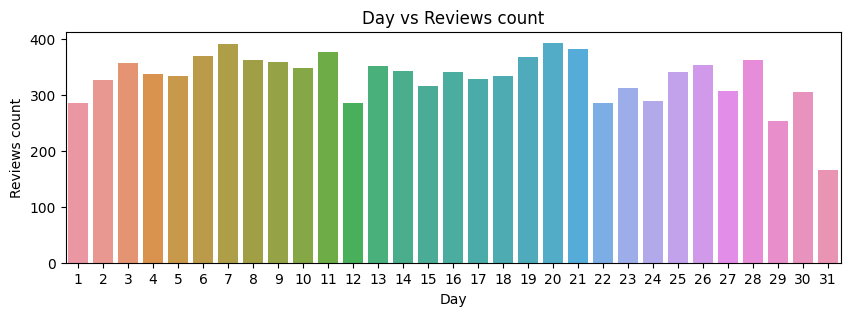

In [35]:
day=pd.DataFrame(df.groupby('day')['reviews'].count()).reset_index()
day['day']=day['day'].astype('int64')
day.sort_values(by=['day'])

#Plotting the graph
plt.figure(figsize=(10,3))
sns.barplot(x="day", y="reviews", data=day)
plt.title('Day vs Reviews count')
plt.xlabel('Day')
plt.ylabel('Reviews count')
plt.show()

The review counts are more or less uniformly distributed.There isn't much variance between the days. But there is a huge drop at the end of month.

**Creating few more features for text analysis<br><br>**
Now, let's create polarity, review length and word count

Polarity: We use Textblob for for figuring out the rate of sentiment . It is between [-1,1] where -1 is negative and 1 is positive polarity

Review length: length of the review which includes each letters and spaces

Word length: This measures how many words are there in review

In [36]:
from textblob import TextBlob
df['polarity'] = df['reviews'].map(lambda text: TextBlob(text).sentiment.polarity)
df['review_len'] = df['reviews'].astype(str).apply(len)
df['word_count'] = df['reviews'].apply(lambda x: len(str(x).split()))

In [37]:
df.head()

reviewerID        asin  overall  \
0  A2IBPI20UZIR0U  1384719342      5.0   
1  A14VAT5EAX3D9S  1384719342      5.0   
2  A195EZSQDW3E21  1384719342      5.0   
3  A2C00NNG1ZQQG2  1384719342      5.0   
4   A94QU4C90B1AX  1384719342      5.0   

                                             reviews sentiment   year day  \
0  not much write exactly suppose filter pop soun...  Positive   2014  28   
1  product exactly quite affordablei not realize ...  Positive   2013  16   
2  primary job device block breath would otherwis...  Positive   2013  28   
3  nice windscreen protect mxl mic prevent pop th...  Positive   2014  14   
4  pop filter great look perform like studio filt...  Positive   2014  21   

  month  helpful_rate  polarity  review_len  word_count  
0    02         -1.00  0.233333         149          24  
1    03          0.93 -0.057143         330          55  
2    08          1.00  0.167500         301          48  
3    02         -1.00  0.333333         165          22  
4    02         -1.00  0.800000         117          20

In [38]:
from plotly.offline import iplot
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

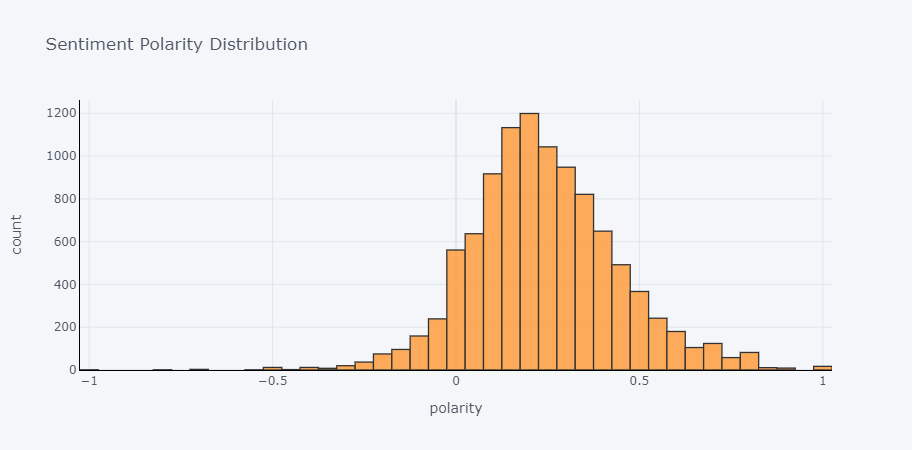

In [39]:
df['polarity'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution')

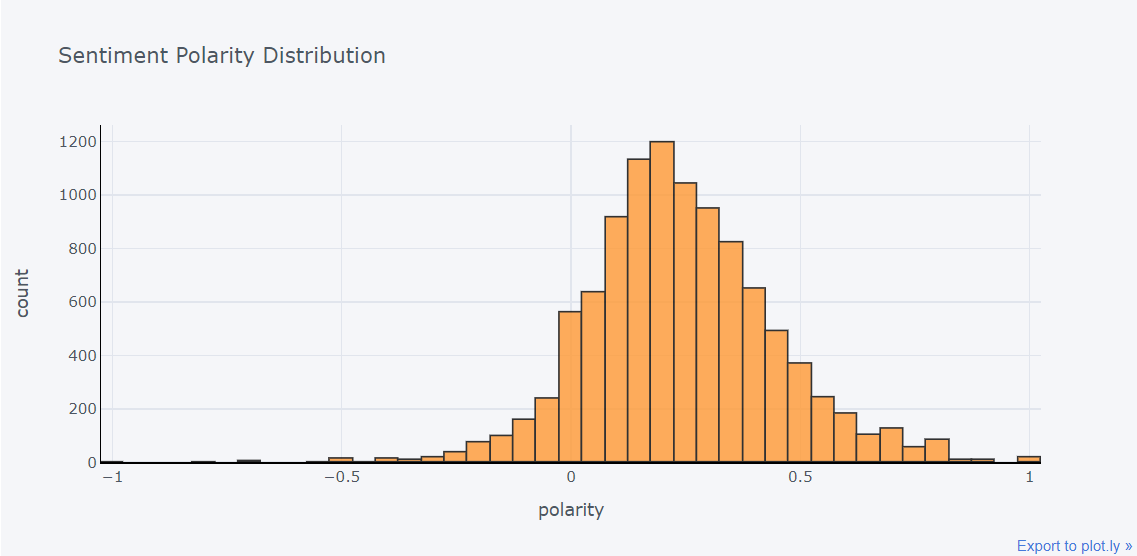

We have a lot of positive polarities compared to the negative polarities
This polarity distributions assures the number of positive reviews we had.We can say that this polarity is a normally distributed but not standard normal

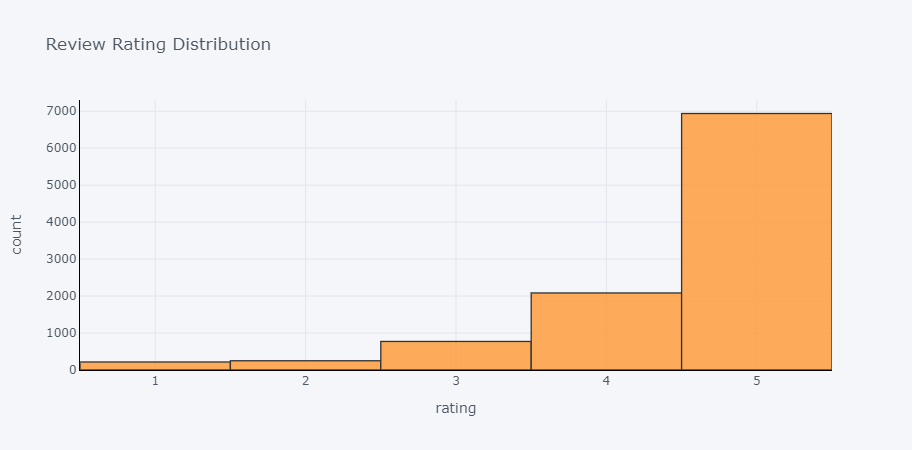

In [40]:
df['overall'].iplot(
    kind='hist',
    xTitle='rating',
    linecolor='black',
    yTitle='count',
    title='Review Rating Distribution')

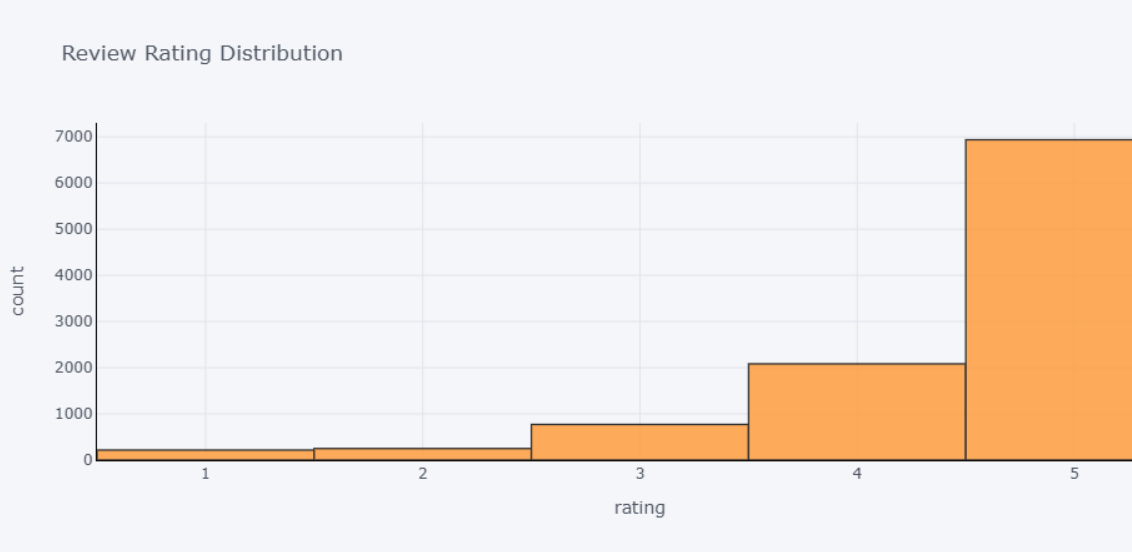

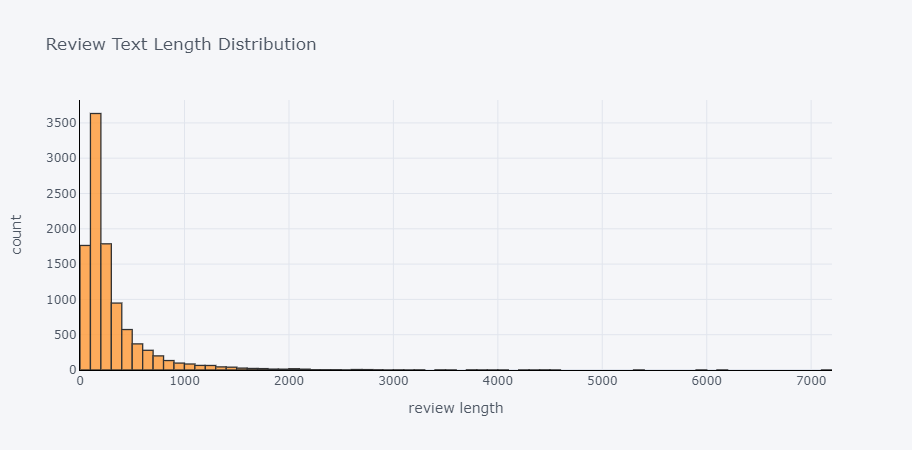

In [41]:

df['review_len'].iplot(
    kind='hist',
    bins=100,
    xTitle='review length',
    linecolor='black',
    yTitle='count',
    title='Review Text Length Distribution')

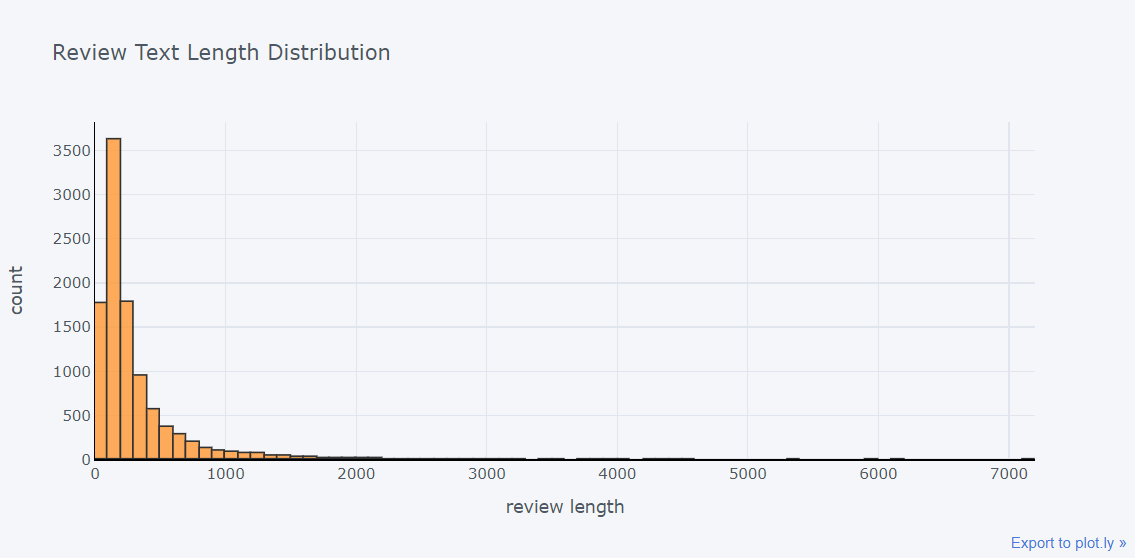

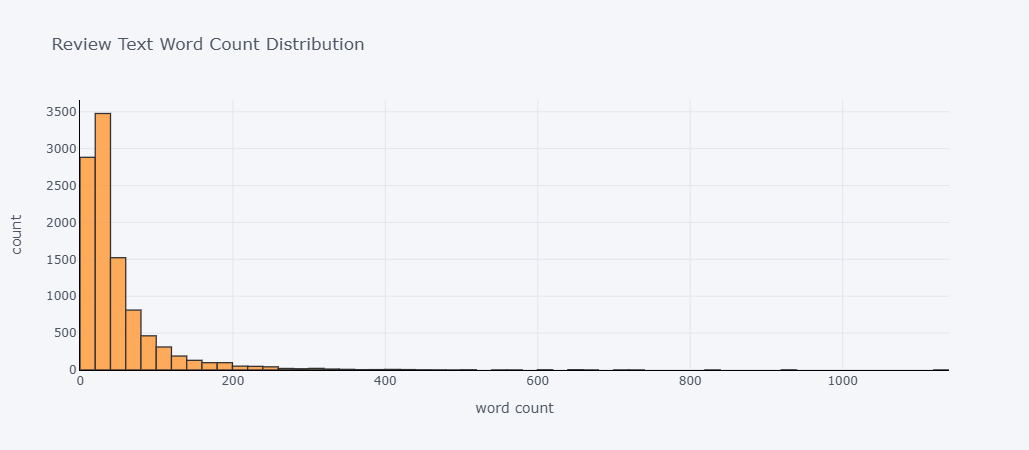

In [42]:
df['word_count'].iplot(
    kind='hist',
    bins=100,
    xTitle='word count',
    linecolor='black',
    yTitle='count',
    title='Review Text Word Count Distribution')

/opt/conda/lib/python3.10/site-packages/plotly/tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



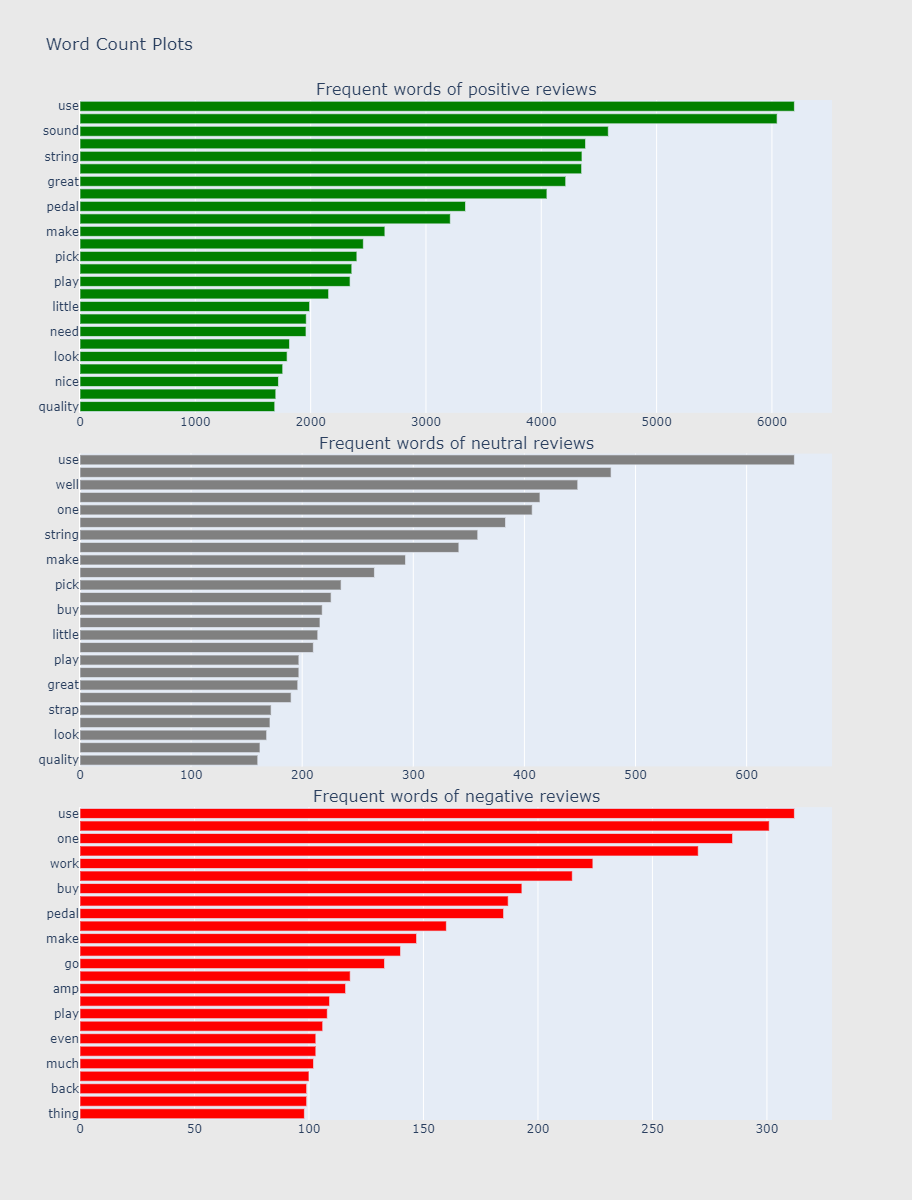

In [43]:
from collections import defaultdict
from wordcloud import WordCloud,STOPWORDS
import plotly.graph_objs as go
from plotly import tools



review_pos = df[df["sentiment"]=='Positive'].dropna()
review_neu = df[df["sentiment"]=='Neutral'].dropna()
review_neg = df[df["sentiment"]=='Negative'].dropna()

## custom function for ngram generation ##
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in review_pos["reviews"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'green')

## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in review_neu["reviews"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'grey')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in review_neg["reviews"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'red')

# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')


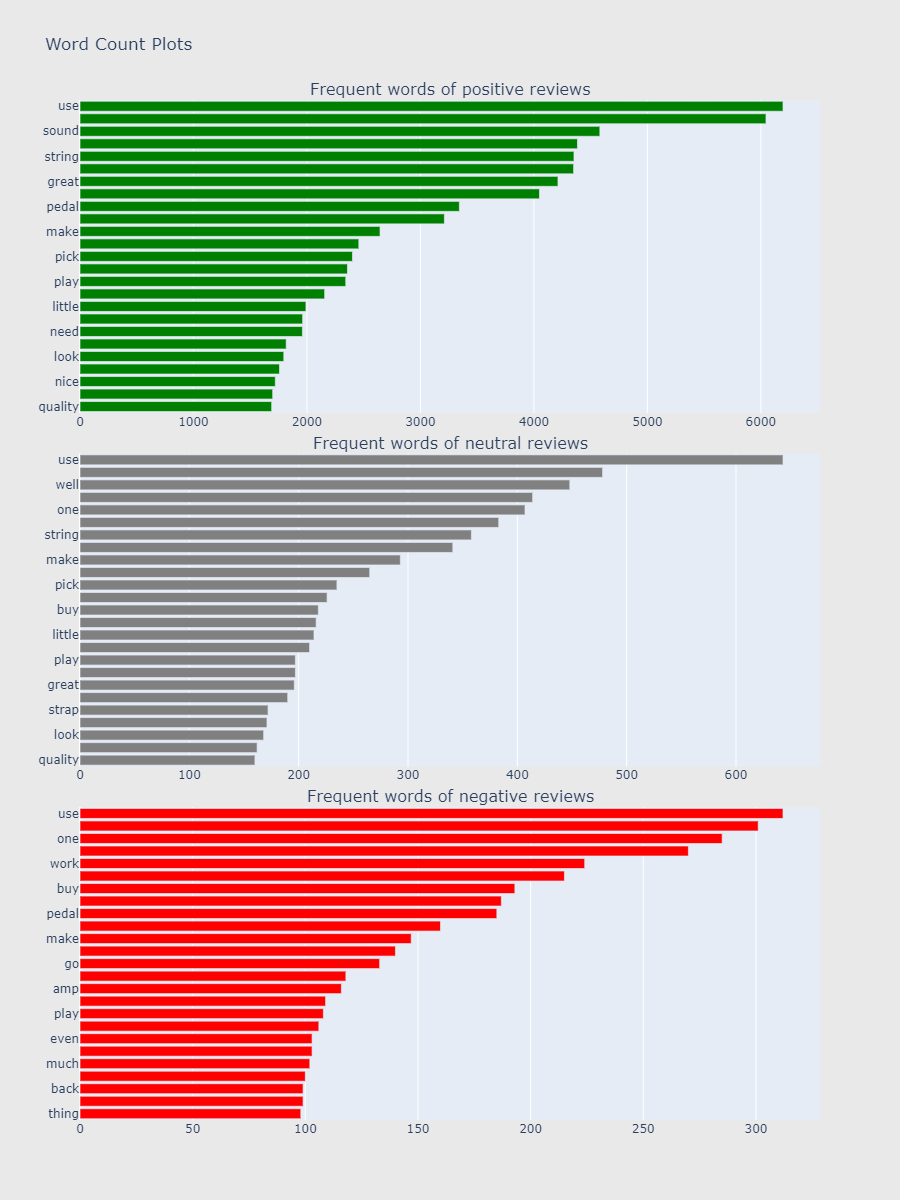

As we see, the words doen't match with the sentiment except few. Through monogram we can't judge a sendiment based on one word. So let's try with frequent two words

**Bigram analysis**<br>
Here we will plot most frequent two words in reviews based on sentiments

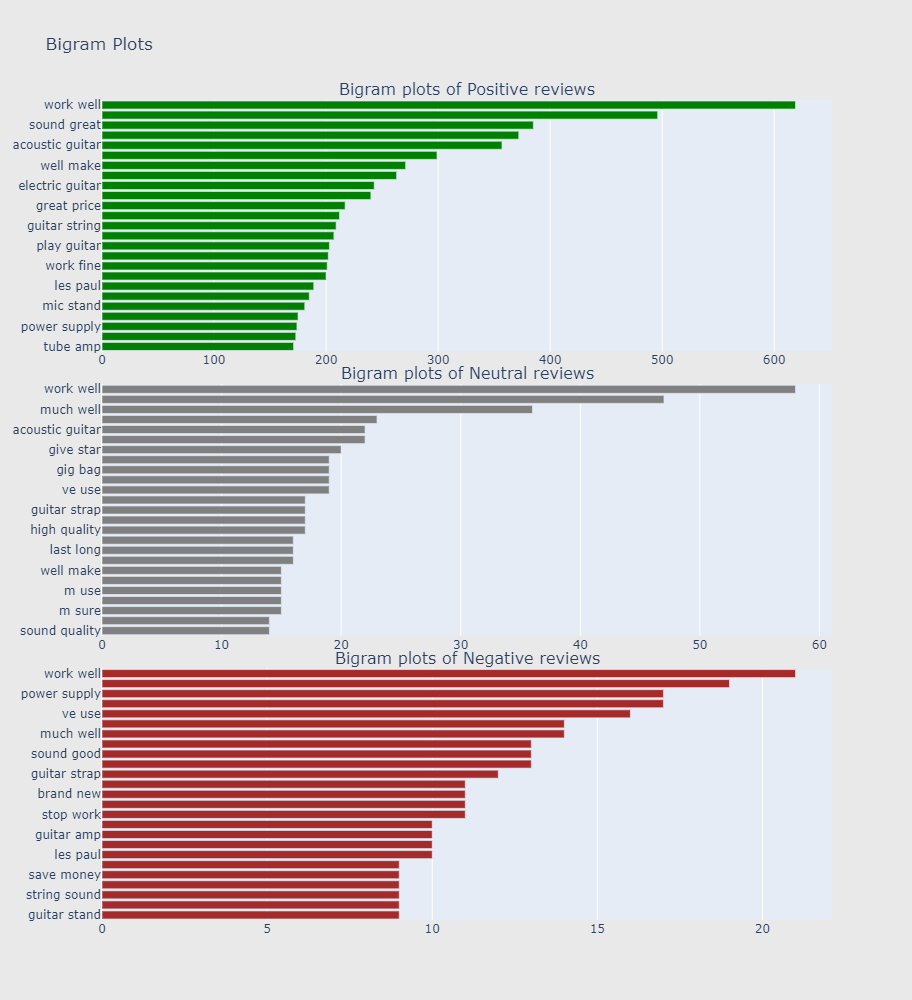

In [44]:

## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in review_pos["reviews"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'green')

## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in review_neu["reviews"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'grey')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in review_neg["reviews"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'brown')



# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04,horizontal_spacing=0.25,
                          subplot_titles=["Bigram plots of Positive reviews", 
                                          "Bigram plots of Neutral reviews",
                                          "Bigram plots of Negative reviews"
                                          ])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)


fig['layout'].update(height=1000, width=800, paper_bgcolor='rgb(233,233,233)', title="Bigram Plots")
iplot(fig, filename='word-plots')

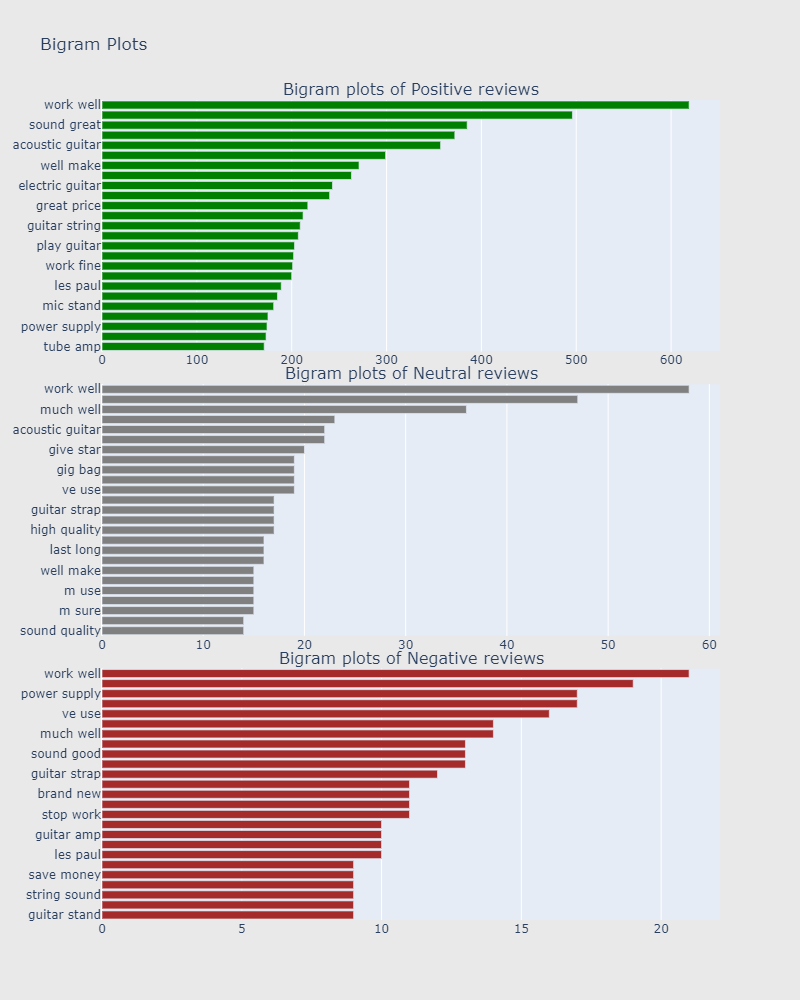

Here we can get a clear idea about the sentiments from the bi-words


**Trigram analysis**<br>
Here we will plot most frequent three words in reviews based on sentiments

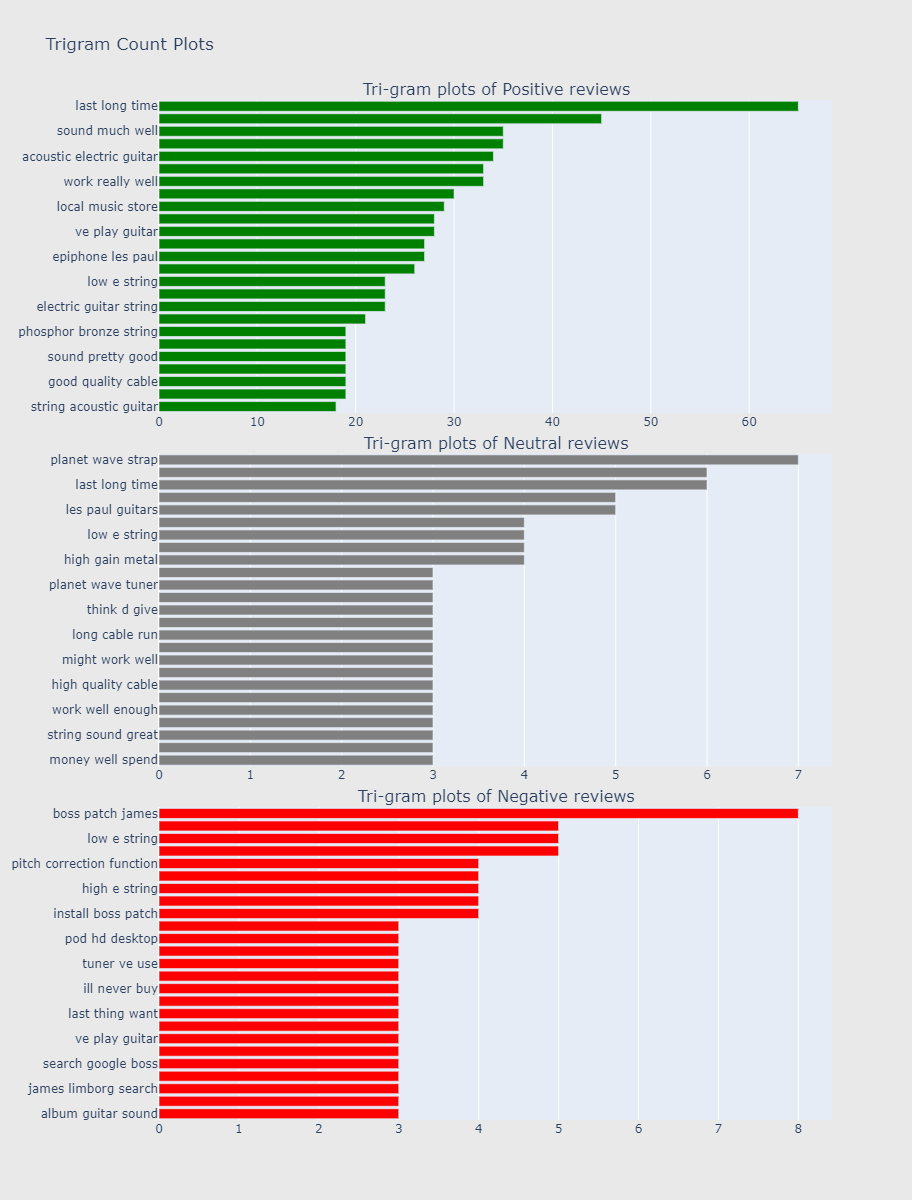

In [45]:
for sent in review_pos["reviews"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'green')

## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in review_neu["reviews"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'grey')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in review_neg["reviews"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'red')




# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04, horizontal_spacing=0.05,
                          subplot_titles=["Tri-gram plots of Positive reviews", 
                                          "Tri-gram plots of Neutral reviews",
                                          "Tri-gram plots of Negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=1200, paper_bgcolor='rgb(233,233,233)', title="Trigram Count Plots")
iplot(fig, filename='word-plots')

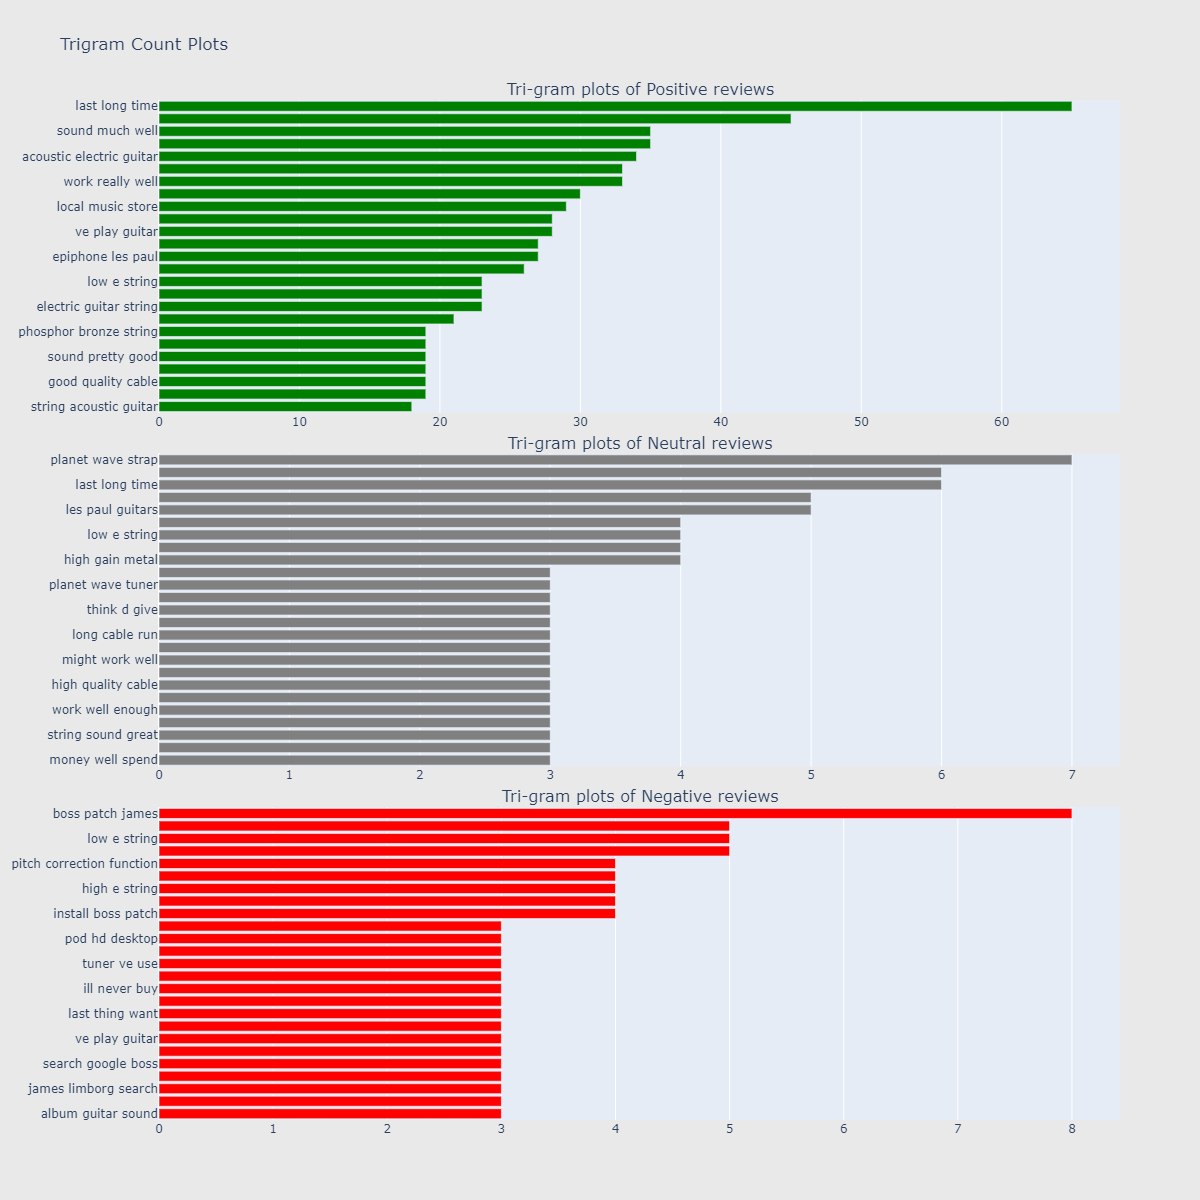

We have completed our text ngram analysis. Let's look at wordcloud

**Wordcloud-Positive reviews**

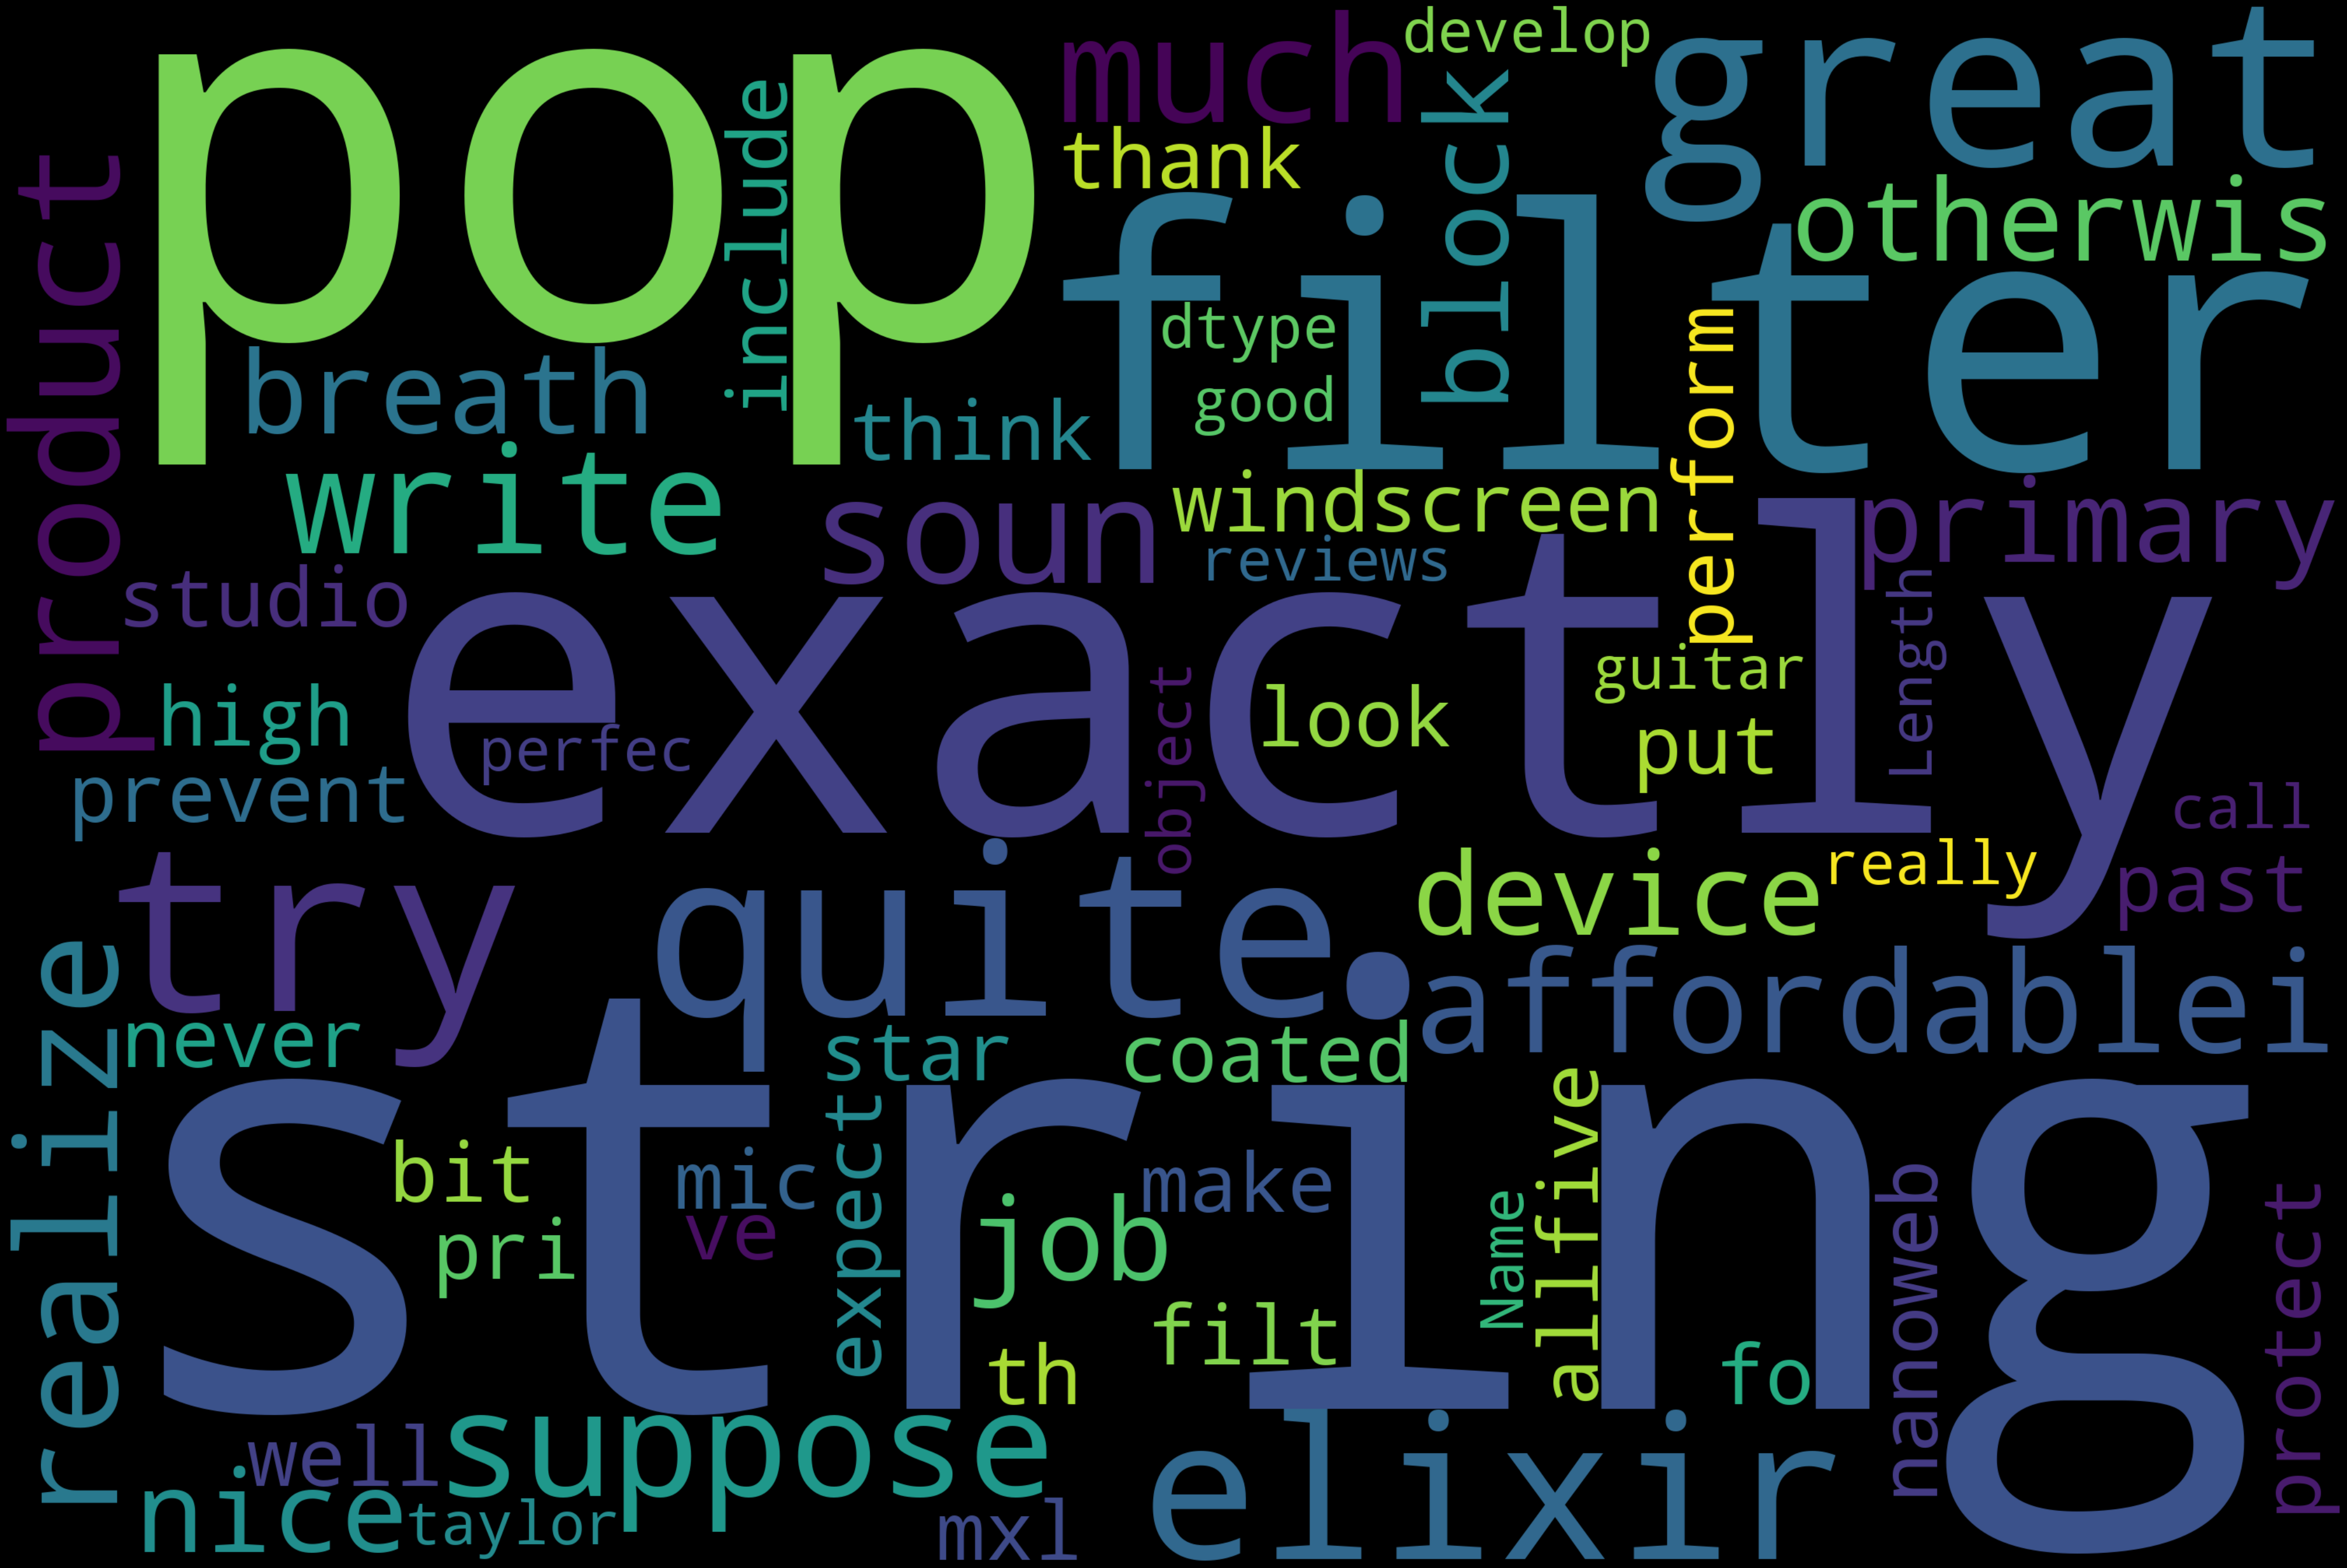

In [46]:
text = review_pos["reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

We can see positive words like great,affordable,nice,exactly etc.,

Let's look at the word cloud of neutral reviews

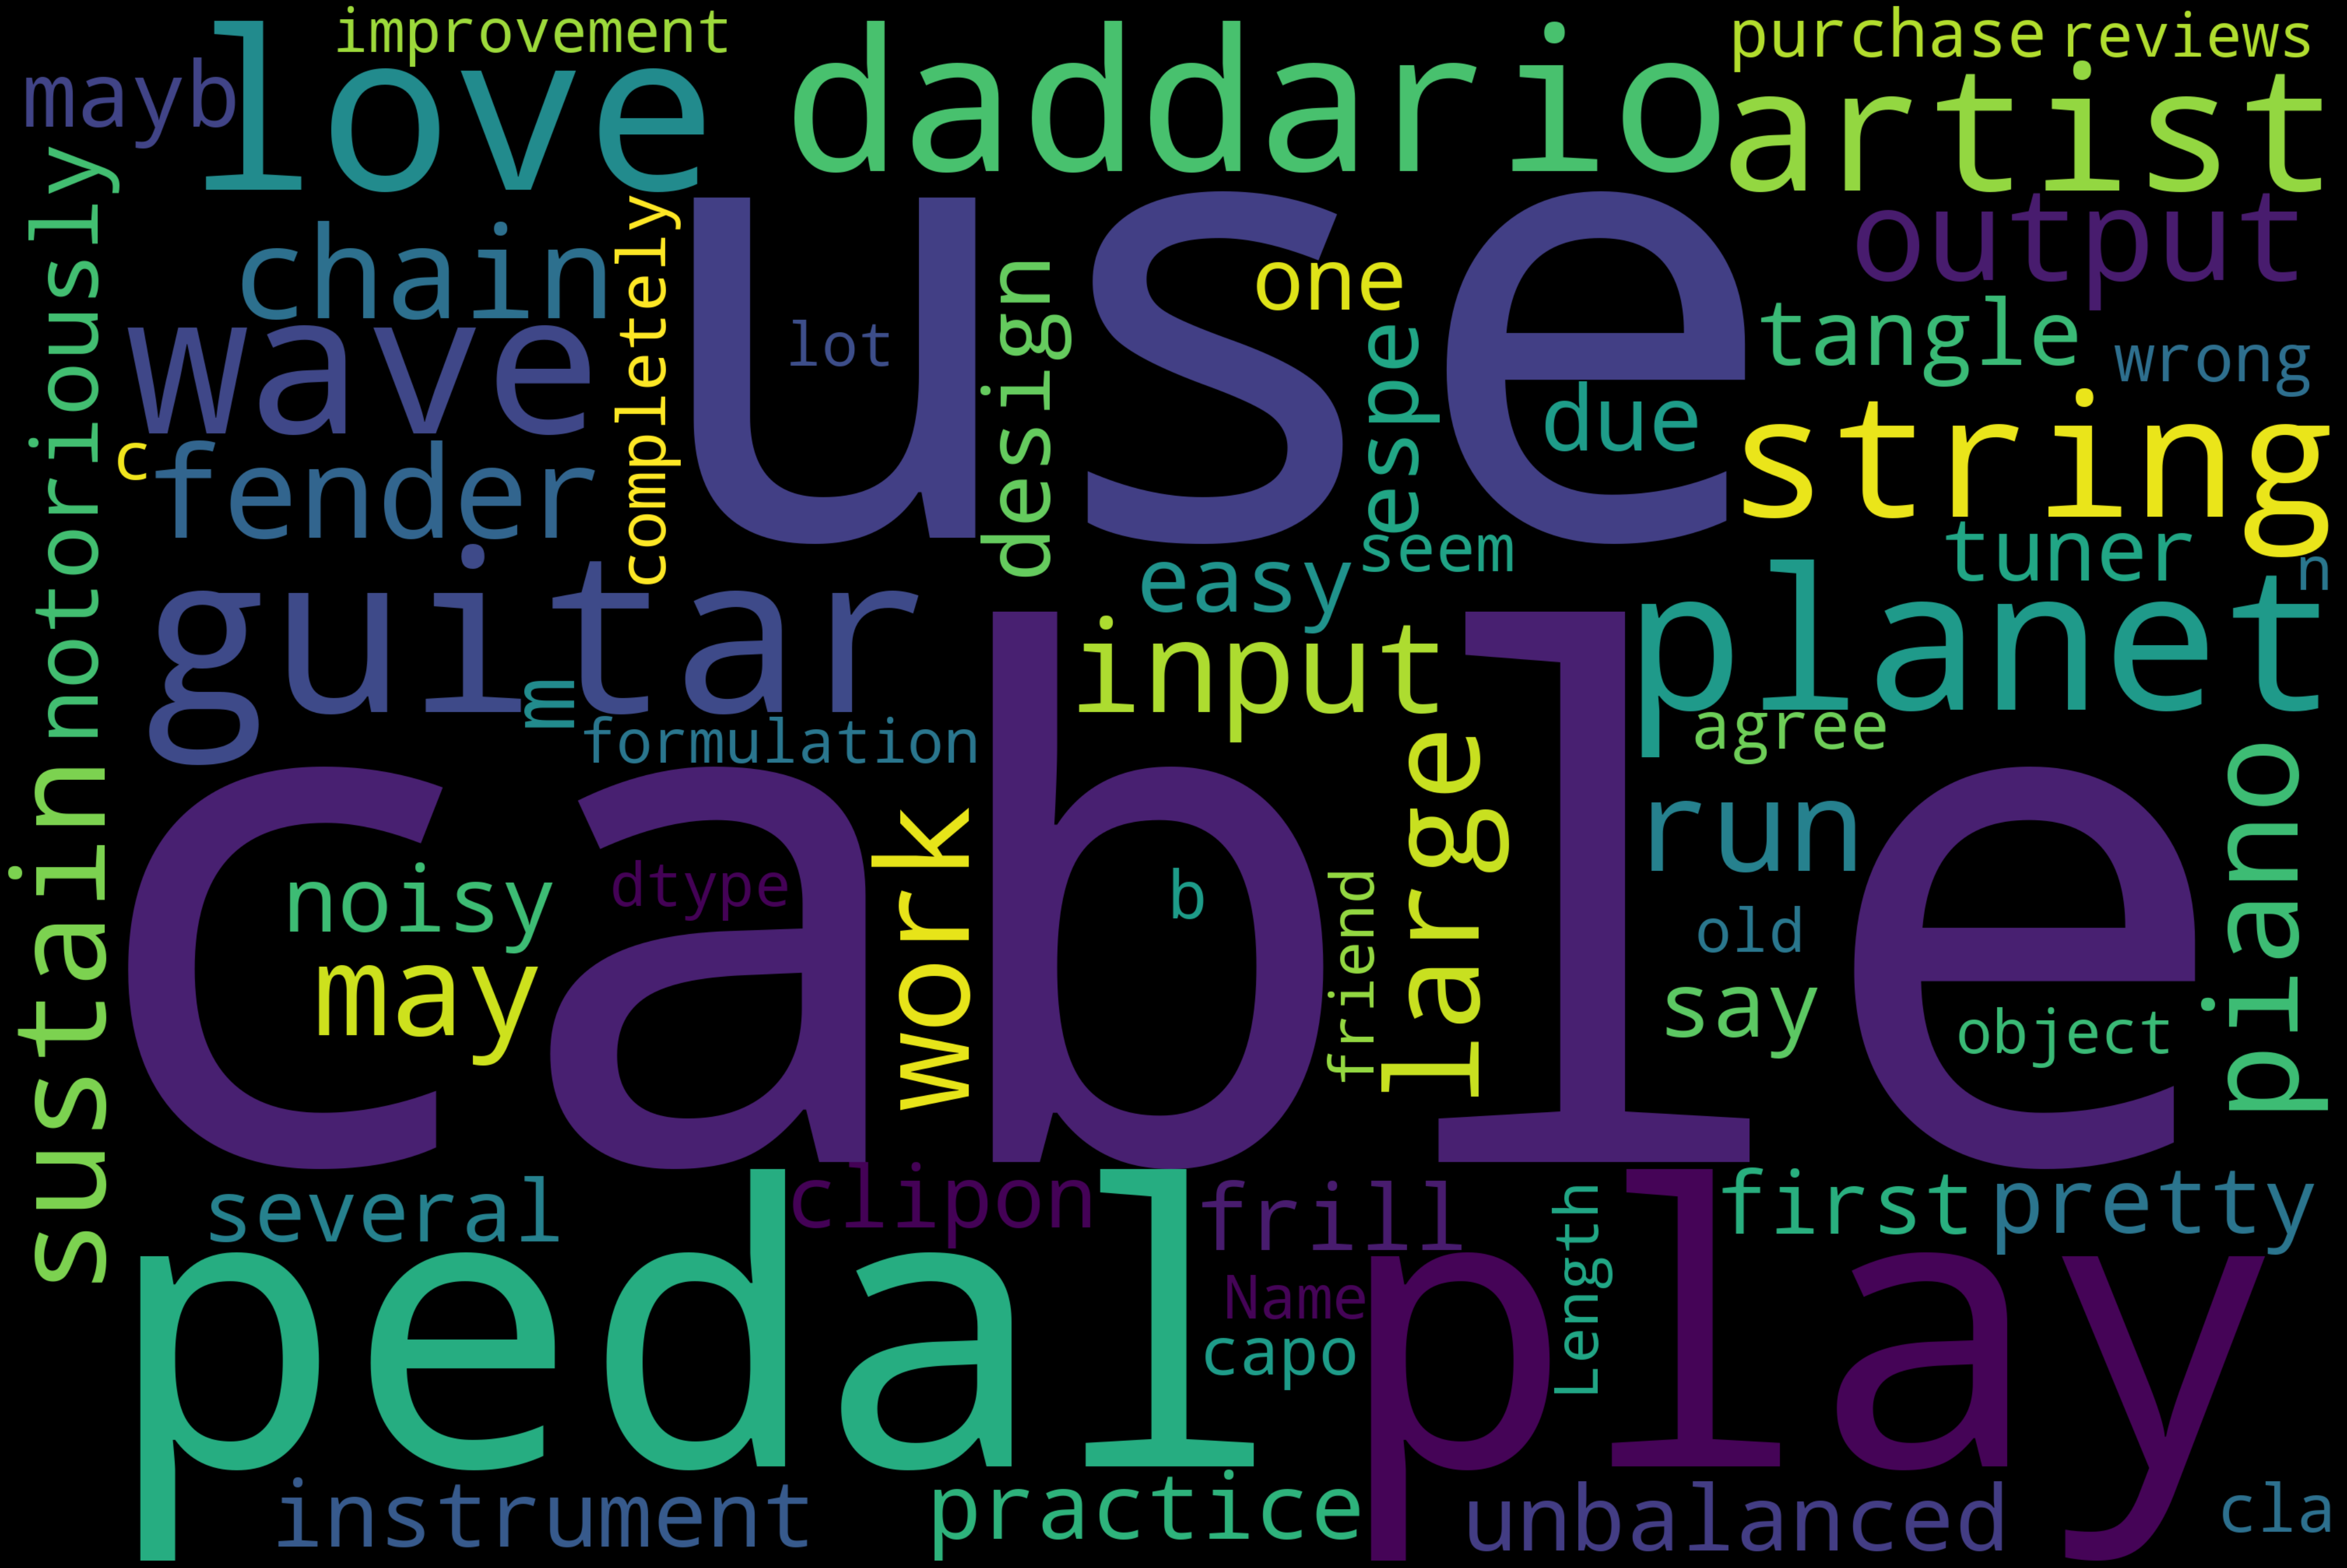

In [47]:
text = review_neu["reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Let's look at the word cloud of negative reviews

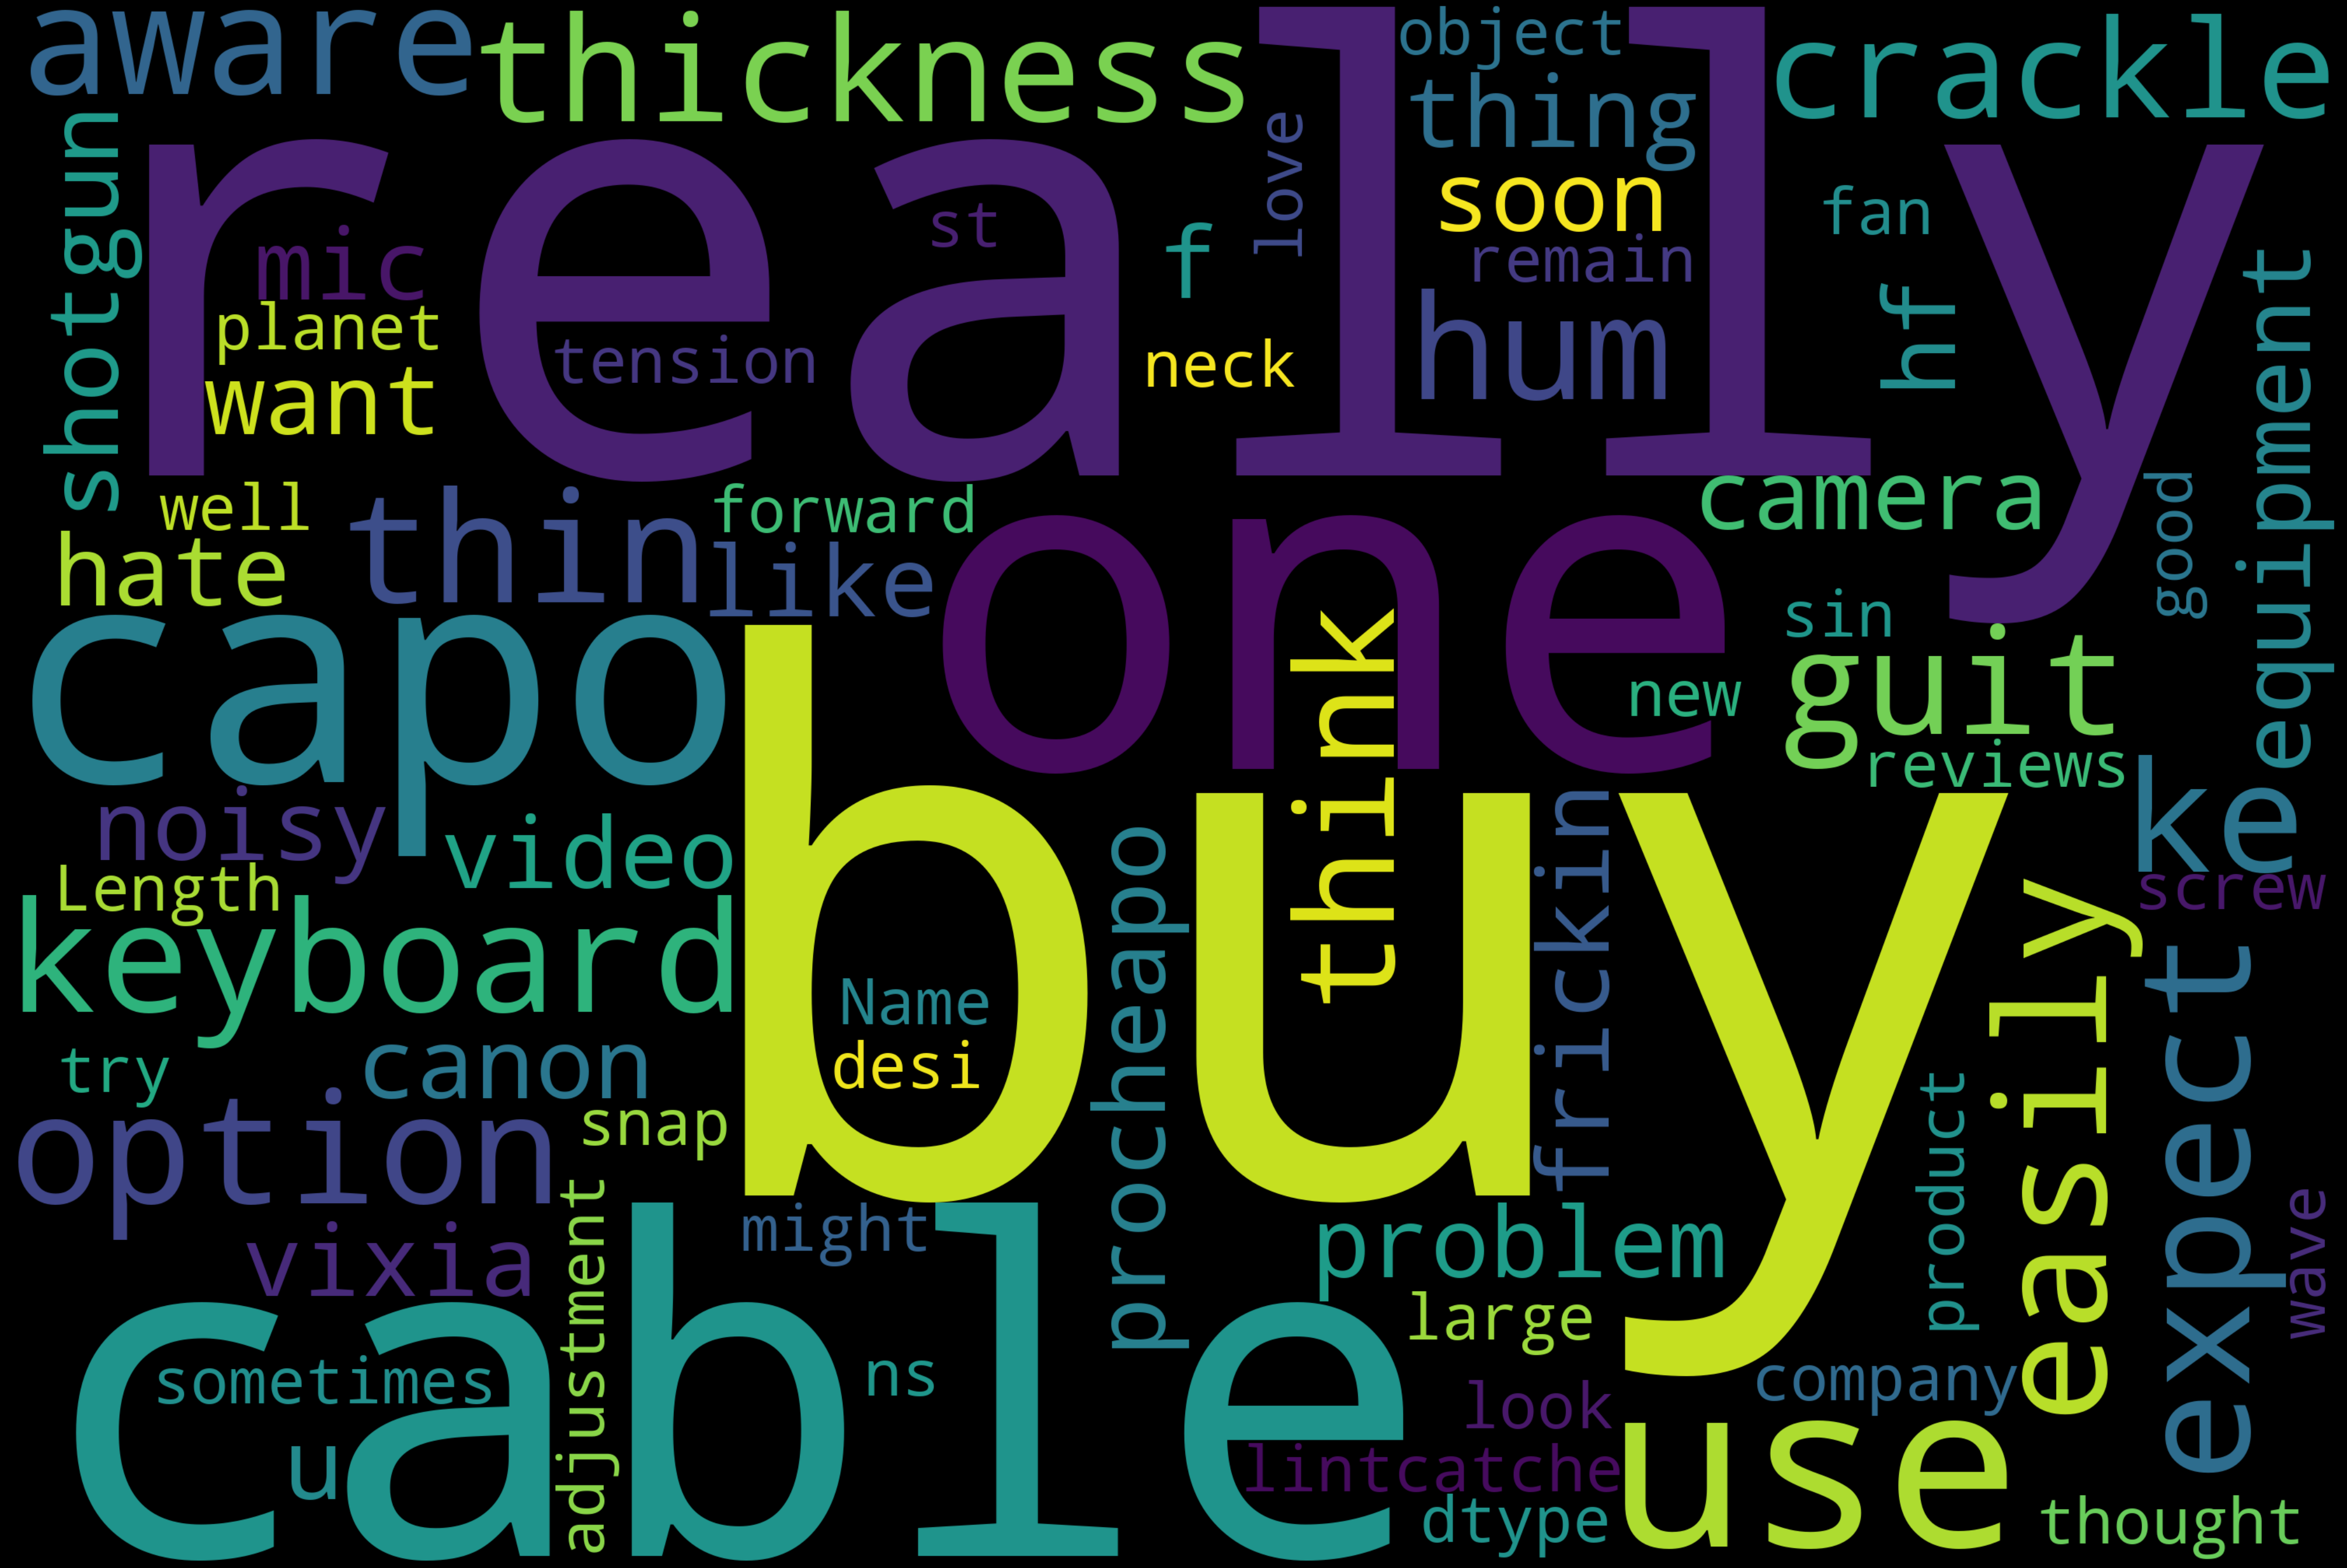

In [48]:
text = review_neg["reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = stop_words).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

We can see negative review words such as noisy,didnt,frickin,wasnt,snap,problems,tension etc.,

# Predcitions

In [49]:
df['sentiment']=df['sentiment'].replace(['Positive','Neutral','Negative'],[2,1,0])

In [50]:
df.head()

reviewerID        asin  overall  \
0  A2IBPI20UZIR0U  1384719342      5.0   
1  A14VAT5EAX3D9S  1384719342      5.0   
2  A195EZSQDW3E21  1384719342      5.0   
3  A2C00NNG1ZQQG2  1384719342      5.0   
4   A94QU4C90B1AX  1384719342      5.0   

                                             reviews  sentiment   year day  \
0  not much write exactly suppose filter pop soun...          2   2014  28   
1  product exactly quite affordablei not realize ...          2   2013  16   
2  primary job device block breath would otherwis...          2   2013  28   
3  nice windscreen protect mxl mic prevent pop th...          2   2014  14   
4  pop filter great look perform like studio filt...          2   2014  21   

  month  helpful_rate  polarity  review_len  word_count  
0    02         -1.00  0.233333         149          24  
1    03          0.93 -0.057143         330          55  
2    08          1.00  0.167500         301          48  
3    02         -1.00  0.333333         165          22  
4    02         -1.00  0.800000         117          20

In [51]:
X = df['reviews']
y = df['sentiment']

In [117]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

**Bag of Words model**

CountVectorizer is used to transform a given text into a vector on the basis of the frequency(count) of each word that occurs in the entire text.It involves counting the number of occurences each words appears in a document(text)

In [143]:
count_vectorizer = CountVectorizer(max_features=10000,ngram_range=(1, 3))
count_vector = count_vectorizer.fit_transform(X)
print(count_vector[0].todense())

[[0 0 0 ... 0 0 0]]


**Tf-Idf**

In [144]:
tfidf_vectorizer = TfidfVectorizer(max_features=10000,ngram_range = (1,3))
tfidf = tfidf_vectorizer.fit_transform(X)
print(tfidf[0].todense())

[[0. 0. 0. ... 0. 0. 0.]]


**SMOTE technique to balance the dataset**

So we can clearly see that our dataset is imbalanced dataset.We will use SMOTE technique to balance the dataset.SMOTE is an oversampling technique where the synthetic samples are generated for the minority class.The algorithm helps to overcome the overfitting problem posed by random sampling.

In [59]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smote_cv, Y_smote_cv = smote.fit_resample(count_vector,y)

In [146]:
smote = SMOTE()
X_smote_tfidf, Y_smote_tfidf = smote.fit_resample(tfidf,y)

In [147]:
from sklearn.model_selection import train_test_split
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_smote_cv, Y_smote_cv, test_size = 0.20, random_state = 0)
X_train_cv.shape, X_test_cv.shape,y_train_cv.shape, y_test_cv.shape

((21652, 10000), (5414, 10000), (21652,), (5414,))

In [148]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_smote_tfidf, Y_smote_tfidf , test_size = 0.20, random_state = 0)

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

**Prediction on Bag of words vectors**

In [150]:
from sklearn.metrics import classification_report
lr = LogisticRegression(solver='lbfgs', max_iter=1000)
lr.fit(X_train_cv,y_train_cv)
predict_lr = lr.predict(X_test_cv)
print(classification_report(y_test_cv, predict_lr))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1852
           1       0.74      0.86      0.80      1811
           2       0.93      0.88      0.91      1751

    accuracy                           0.84      5414
   macro avg       0.84      0.84      0.84      5414
weighted avg       0.84      0.84      0.84      5414



In [152]:
nb = MultinomialNB()
nb.fit(X_train_cv,y_train_cv)
predict_nb = nb.predict(X_test_cv)
print(classification_report(y_test_cv, predict_nb))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      1852
           1       0.76      0.61      0.68      1811
           2       0.75      0.93      0.83      1751

    accuracy                           0.76      5414
   macro avg       0.76      0.76      0.75      5414
weighted avg       0.76      0.76      0.75      5414



In [154]:
rf = RandomForestClassifier()
rf.fit(X_train_cv,y_train_cv)
predict_rf = rf.predict(X_test_cv)
print(classification_report(y_test_cv, predict_rf))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89      1852
           1       0.83      0.91      0.87      1811
           2       0.91      0.92      0.91      1751

    accuracy                           0.89      5414
   macro avg       0.89      0.89      0.89      5414
weighted avg       0.89      0.89      0.89      5414



**Prediction On Tf-Idf vectors**

In [155]:
lr = LogisticRegression(solver='lbfgs', max_iter=1000)
lr.fit(X_train_tfidf,y_train_tfidf)
predict_lr = lr.predict(X_test_tfidf)
print(classification_report(y_test_tfidf, predict_lr))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1852
           1       0.93      0.99      0.96      1811
           2       0.99      0.90      0.94      1751

    accuracy                           0.96      5414
   macro avg       0.96      0.96      0.96      5414
weighted avg       0.96      0.96      0.96      5414



In [156]:
nb = MultinomialNB()
nb.fit(X_train_tfidf,y_train_tfidf)
predict_nb = nb.predict(X_test_tfidf)
print(classification_report(y_test_tfidf, predict_nb))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1852
           1       0.88      0.97      0.92      1811
           2       0.98      0.82      0.89      1751

    accuracy                           0.93      5414
   macro avg       0.93      0.93      0.93      5414
weighted avg       0.93      0.93      0.93      5414



In [157]:
rf = RandomForestClassifier()
rf.fit(X_train_tfidf,y_train_tfidf)
predict_rf = rf.predict(X_test_tfidf)
print(classification_report(y_test_tfidf, predict_rf))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1852
           1       0.97      0.97      0.97      1811
           2       0.96      0.97      0.97      1751

    accuracy                           0.98      5414
   macro avg       0.98      0.98      0.98      5414
weighted avg       0.98      0.98      0.98      5414



**Applying Stratified K-fold Cross Validation on Random Forest Classifier (trained on tfidf vectors)** 

In [159]:
from statistics import mean
rf_skcv = RandomForestClassifier()

# StratifiedKFold object.
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified_rf = []
   
for train_index, test_index in skf.split(X_smote_tfidf,Y_smote_tfidf):
    x_train_fold, x_test_fold = X_smote_tfidf[train_index], X_smote_tfidf[test_index]
    y_train_fold, y_test_fold = Y_smote_tfidf[train_index], Y_smote_tfidf[test_index]
    rf_skcv.fit(x_train_fold, y_train_fold)
    lst_accu_stratified_rf.append(rf_skcv.score(x_test_fold, y_test_fold))
   
print('List of possible accuracy:', lst_accu_stratified_rf)
print('\nMaximum Accuracy That can be obtained from this model is:', max(lst_accu_stratified_rf)*100, '%')
print('\nMinimum Accuracy:', min(lst_accu_stratified_rf)*100, '%')
print('\nOverall Accuracy:', mean(lst_accu_stratified_rf)*100, '%')

List of possible accuracy: [0.9841152567417806, 0.9804211304026598, 0.9785740672330994, 0.9789434798670115, 0.9804211304026598, 0.9818987809383081, 0.9796747967479674, 0.9811529933481153, 0.983370288248337, 0.9796747967479674]

Maximum Accuracy That can be obtained from this model is: 98.41152567417805 %

Minimum Accuracy: 97.85740672330994 %

Overall Accuracy: 98.08246720677907 %


**Training LSTM**

In [53]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

texts = df['reviews']
max_features = 5000  # Number of unique words to use

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

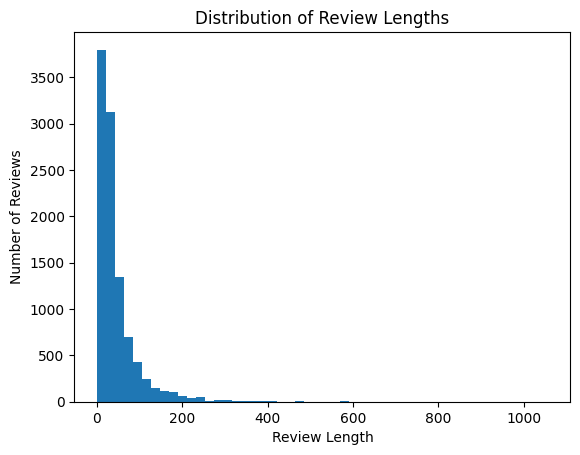

Max review length: 1057
Mean review length: 45.87301432608908
Median review length: 28.0


In [54]:
import matplotlib.pyplot as plt

# Get the lengths of all reviews
review_lengths = [len(seq) for seq in sequences]

# Plot the distribution of review lengths
plt.hist(review_lengths, bins=50)
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Review Lengths')
plt.show()

# Print some statistics
print(f'Max review length: {max(review_lengths)}')
print(f'Mean review length: {np.mean(review_lengths)}')
print(f'Median review length: {np.median(review_lengths)}')


In [55]:
max_len = 500 # Maximum length of sequences
padded_sequences = pad_sequences(sequences, maxlen=max_len)

In [80]:
padded_sequences

array([[   0,    0,    0, ...,  891,   15, 1109],
       [   0,    0,    0, ...,   11,  278,   49],
       [   0,    0,    0, ..., 1508,  113,    5],
       ...,
       [   0,    0,    0, ...,    4,   68,  754],
       [   0,    0,    0, ..., 1599,  793,   16],
       [   0,    0,    0, ...,    1,  666,  109]], dtype=int32)

In [81]:
padded_sequences.shape

(10261, 500)

In [56]:
labels = pd.get_dummies(df['sentiment']).values

In [57]:
labels

array([[False, False,  True],
       [False, False,  True],
       [False, False,  True],
       ...,
       [False, False,  True],
       [False, False,  True],
       [False, False,  True]])

In [58]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout, Bidirectional

embedding_dim = 100

model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=max_len))
model.add(Bidirectional(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))  # Assuming 3 classes for positive, neutral, and negative
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

In [65]:
from keras.callbacks import EarlyStopping

batch_size = 32
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')
history = model.fit(X_train, y_train, epochs = 10, batch_size=batch_size, verbose = 1, validation_data= (X_test, y_test),callbacks=[earlystop])

Epoch 1/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 296s 1s/step - accuracy: 0.8487 - loss: 0.5433 - val_accuracy: 0.8768 - val_loss: 0.3823
Epoch 2/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 292s 1s/step - accuracy: 0.8903 - loss: 0.3182 - val_accuracy: 0.8763 - val_loss: 0.3673
Epoch 3/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 292s 1s/step - accuracy: 0.9063 - loss: 0.2568 - val_accuracy: 0.8841 - val_loss: 0.3982
Epoch 4/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 292s 1s/step - accuracy: 0.9219 - loss: 0.2073 - val_accuracy: 0.8763 - val_loss: 0.4485
Epoch 5/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 320s 1s/step - accuracy: 0.9486 - loss: 0.1509 - val_accuracy: 0.8553 - val_loss: 0.4967


In [66]:
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

In [68]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict probabilities for each class
Y_pred_prob = model.predict(X_test, batch_size=batch_size)

# Convert probabilities to class predictions
Y_pred = np.argmax(Y_pred_prob, axis=1)

# Convert one-hot encoded y_test to class labels
y_test_classes = np.argmax(y_test, axis=1)

# Create a DataFrame for comparison
df_test = pd.DataFrame({'true': y_test_classes, 'pred': Y_pred})

print("Confusion matrix:\n", confusion_matrix(df_test.true, df_test.pred))
print("Classification report:\n", classification_report(df_test.true, df_test.pred))


65/65 ━━━━━━━━━━━━━━━━━━━━ 16s 246ms/step
Confusion matrix:
 [[  23   20   61]
 [  14   35   91]
 [  35   76 1698]]
Classification report:
               precision    recall  f1-score   support

           0       0.32      0.22      0.26       104
           1       0.27      0.25      0.26       140
           2       0.92      0.94      0.93      1809

    accuracy                           0.86      2053
   macro avg       0.50      0.47      0.48      2053
weighted avg       0.84      0.86      0.85      2053



It is clearly visible that f1 score of 0 and 1 class is very bad due to imbalance present in the dataset. We will use 2 approach to improve the model's performance:

1)Up sampling the minority class<br>
2)Using class wight method

In [83]:
import pandas as pd
from sklearn.utils import resample
from sklearn.utils import shuffle


# Separate majority and minority classes
data_positive = df[df['sentiment'] == 2]
data_neutral = df[df['sentiment'] == 1]
data_negative = df[df['sentiment'] == 0]

# Split data into training and test sets (80% train, 20% test)
train_positive = data_positive.sample(frac=0.8)
test_positive = data_positive.drop(train_positive.index)

train_neutral = data_neutral.sample(frac=0.8)
test_neutral = data_neutral.drop(train_neutral.index)

train_negative = data_negative.sample(frac=0.8)
test_negative = data_negative.drop(train_negative.index)

train = pd.concat([train_positive, train_neutral, train_negative])
test = pd.concat([test_positive, test_neutral, test_negative])

train = shuffle(train)
test = shuffle(test)

# Separate classes in training data for upsampling
train_positive = train[train['sentiment'] == 2]
train_neutral = train[train['sentiment'] == 1]
train_negative = train[train['sentiment'] == 0]

print("Class counts before upsampling:")
print(train['sentiment'].value_counts())

# Upsample minority classes to match the majority class
n_samples = train_positive.shape[0]  

train_negative_upsampled = resample(train_negative, 
                                    replace=True, 
                                    n_samples=n_samples)

train_neutral_upsampled = resample(train_neutral, 
                                   replace=True, 
                                   n_samples=n_samples)

# Combine majority class with upsampled minority classes
train_upsampled = pd.concat([train_positive, train_negative_upsampled, train_neutral_upsampled])

# Shuffle the upsampled training set
train_upsampled = shuffle(train_upsampled)

print("Class counts after upsampling:")
print(train_upsampled['sentiment'].value_counts())

# Proceed with text preprocessing and model training using 'train_upsampled' and 'test'


Class counts before upsampling:
sentiment
2    7218
1     618
0     374
Name: count, dtype: int64
Class counts after upsampling:
sentiment
2    7218
1    7218
0    7218
Name: count, dtype: int64


In [84]:
df['sentiment'].value_counts()

sentiment
2    9022
1     772
0     467
Name: count, dtype: int64

In [85]:
train['sentiment'].value_counts()

sentiment
2    7218
1     618
0     374
Name: count, dtype: int64

In [86]:
test['sentiment'].value_counts()

sentiment
2    1804
1     154
0      93
Name: count, dtype: int64

In [87]:
max_fatures = 5000
tokenizer = Tokenizer(num_words=max_fatures)
tokenizer.fit_on_texts(df['reviews'].values) # training with whole data

X_train = tokenizer.texts_to_sequences(train_upsampled['reviews'].values)
X_train = pad_sequences(X_train,maxlen=500)
Y_train = pd.get_dummies(train_upsampled['sentiment']).values
print('x_train shape:',X_train.shape)

X_test = tokenizer.texts_to_sequences(test['reviews'].values)
X_test = pad_sequences(X_test,maxlen=500)
Y_test = pd.get_dummies(test['sentiment']).values
print("x_test shape", X_test.shape)

x_train shape: (21654, 500)
x_test shape (2051, 500)


In [89]:
embedding_dim = 100

model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=500))
model.add(Bidirectional(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))  # Assuming 3 classes for positive, neutral, and negative
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

In [90]:
batch_size = 64
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')
history = model.fit(X_train, Y_train, epochs = 10, batch_size=batch_size, verbose = 1, validation_data= (X_test, Y_test),callbacks=[earlystop])

Epoch 1/10
339/339 ━━━━━━━━━━━━━━━━━━━━ 377s 1s/step - accuracy: 0.6151 - loss: 0.7821 - val_accuracy: 0.8147 - val_loss: 0.5716
Epoch 2/10
339/339 ━━━━━━━━━━━━━━━━━━━━ 374s 1s/step - accuracy: 0.9555 - loss: 0.1360 - val_accuracy: 0.8323 - val_loss: 0.7372
Epoch 3/10
339/339 ━━━━━━━━━━━━━━━━━━━━ 373s 1s/step - accuracy: 0.9801 - loss: 0.0636 - val_accuracy: 0.8547 - val_loss: 0.7987
Epoch 4/10
339/339 ━━━━━━━━━━━━━━━━━━━━ 373s 1s/step - accuracy: 0.9906 - loss: 0.0372 - val_accuracy: 0.8581 - val_loss: 0.9263


In [91]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict probabilities for each class
Y_pred_prob = model.predict(X_test, batch_size=batch_size)

# Convert probabilities to class predictions
Y_pred = np.argmax(Y_pred_prob, axis=1)

# Convert one-hot encoded y_test to class labels
y_test_classes = np.argmax(Y_test, axis=1)

# Create a DataFrame for comparison
df_test = pd.DataFrame({'true': y_test_classes, 'pred': Y_pred})

print("Confusion matrix:\n", confusion_matrix(df_test.true, df_test.pred))
print("Classification report:\n", classification_report(df_test.true, df_test.pred))


33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 245ms/step
Confusion matrix:
 [[  25   11   57]
 [  19   23  112]
 [  42   50 1712]]
Classification report:
               precision    recall  f1-score   support

           0       0.29      0.27      0.28        93
           1       0.27      0.15      0.19       154
           2       0.91      0.95      0.93      1804

    accuracy                           0.86      2051
   macro avg       0.49      0.46      0.47      2051
weighted avg       0.83      0.86      0.84      2051



**Class weight method**

In [94]:
train['sentiment'].value_counts()

sentiment
2    7218
1     618
0     374
Name: count, dtype: int64

In [95]:
test['sentiment'].value_counts()

sentiment
2    1804
1     154
0      93
Name: count, dtype: int64

In [96]:
from sklearn.utils import class_weight

# Assuming 'train' is your training DataFrame with 'sentiment' column

# Extract the class labels
y_train_classes = train['sentiment']

# Calculate class weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_classes),
    y=y_train_classes
)

# Create a dictionary mapping the class indices to the class weights
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}
print(class_weights_dict)


{0: 7.31729055258467, 1: 4.428263214670982, 2: 0.3791447307656784}


In [97]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Extract reviews and labels
train_texts = train['reviews'].tolist()
test_texts = test['reviews'].tolist()

# Tokenizer and sequence padding
max_features = 5000
max_len = 500

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(train_texts)
X_train = tokenizer.texts_to_sequences(train_texts)
X_test = tokenizer.texts_to_sequences(test_texts)

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

# Convert labels to categorical format
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train['sentiment'])
y_test = label_encoder.transform(test['sentiment'])

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [99]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the model architecture
embedding_dim = 100
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=max_len))
model.add(Bidirectional(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))  # 3 classes: positive, neutral, negative


# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping callback
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')

# Train the model with class weights
history = model.fit(
    X_train, y_train, 
    epochs=10, 
    batch_size=64, 
    validation_data=(X_test, y_test), 
    class_weight=class_weights_dict,
    callbacks=[earlystop]
)


Epoch 1/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 152s 1s/step - accuracy: 0.6305 - loss: 1.0742 - val_accuracy: 0.6845 - val_loss: 0.8539
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.7123 - loss: 0.8472 - val_accuracy: 0.7738 - val_loss: 0.5774
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.8104 - loss: 0.5335 - val_accuracy: 0.7630 - val_loss: 0.5903
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.8348 - loss: 0.3928 - val_accuracy: 0.7250 - val_loss: 0.7321
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.8719 - loss: 0.2519 - val_accuracy: 0.7543 - val_loss: 0.7019
Epoch 5: early stopping


In [100]:
Y_pred_prob = model.predict(X_test, batch_size=batch_size)

# Convert probabilities to class predictions
Y_pred = np.argmax(Y_pred_prob, axis=1)

# Convert one-hot encoded y_test to class labels
y_test_classes = np.argmax(y_test, axis=1)

# Create a DataFrame for comparison
df_test = pd.DataFrame({'true': y_test_classes, 'pred': Y_pred})

print("Confusion matrix:\n", confusion_matrix(df_test.true, df_test.pred))
print("Classification report:\n", classification_report(df_test.true, df_test.pred))


33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 249ms/step
Confusion matrix:
 [[  32   29   32]
 [  21   75   58]
 [  61  303 1440]]
Classification report:
               precision    recall  f1-score   support

           0       0.28      0.34      0.31        93
           1       0.18      0.49      0.27       154
           2       0.94      0.80      0.86      1804

    accuracy                           0.75      2051
   macro avg       0.47      0.54      0.48      2051
weighted avg       0.85      0.75      0.79      2051

